# Steam games dataset exploration

[Kaggle steam games dataset](https://www.kaggle.com/datasets/mexwell/steamgames)

## Imports

In [2]:
import numpy as np 
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset

In [4]:
#Load Dataset
url = 'https://www.kaggle.com/datasets/mexwell/steamgames'
# Download it loaclly and proceed:
raw_df = pd.read_csv('games.csv')

# Display first 5 rows of dataset
print(raw_df.head())

     AppID                   Name  Release date Estimated owners  Peak CCU  \
0    20200       Galactic Bowling  Oct 21, 2008        0 - 20000         0   
1   655370           Train Bandit  Oct 12, 2017        0 - 20000         0   
2  1732930           Jolt Project  Nov 17, 2021        0 - 20000         0   
3  1355720               Henosis™  Jul 23, 2020        0 - 20000         0   
4  1139950  Two Weeks in Painland   Feb 3, 2020        0 - 20000         0   

   Required age  Price  DLC count  \
0             0  19.99          0   
1             0   0.99          0   
2             0   4.99          0   
3             0   5.99          0   
4             0   0.00          0   

                                      About the game  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   
2  Jolt Project: The army now has a new robotics ...   
3  HENOSIS™ is a mysterious 2D Platform Puzzler w...   
4  ABOUT THE GAME Play as a 

let's explore the raw data before asking specific questions

The CSV file contains information about various games, with the following columns:

AppID: The unique identifier for the game.
Name: The name of the game.
Release date: The release date of the game.
Estimated owners: The estimated number of owners of the game.
Peak CCU: Peak concurrent users.
Required age: The required age to play the game.
Price: The price of the game.
DLC count: The count of downloadable content (DLC) associated with the game.
About the game: A description of the game.
Supported languages: Languages supported by the game.
Achievements count: The number of achievements available in the game.
Categories: Various categories associated with the game (e.g., single-player, multi-player).
Genres: The genres of the game (e.g., Casual, Indie, Sports).
Tags: Various tags associated with the game.
Screenshots: URLs to screenshots of the game.
Movies: URLs to videos or trailers of the game.
Various other columns related to playtime, developers, publishers, etc.

In [5]:
# Display Dataset shape

print(raw_df.shape)

(71716, 39)


In [3]:
# Display Dataset information

print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71716 entries, 0 to 71715
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       71716 non-null  int64  
 1   Name                        71715 non-null  object 
 2   Release date                71716 non-null  object 
 3   Estimated owners            71716 non-null  object 
 4   Peak CCU                    71716 non-null  int64  
 5   Required age                71716 non-null  int64  
 6   Price                       71716 non-null  float64
 7   DLC count                   71716 non-null  int64  
 8   About the game              69280 non-null  object 
 9   Supported languages         71716 non-null  object 
 10  Full audio languages        71716 non-null  object 
 11  Reviews                     9167 non-null   object 
 12  Header image                71716 non-null  object 
 13  Website                     350

In [4]:
# Display Dataset description

print(raw_df.describe())

              AppID       Peak CCU  Required age         Price     DLC count   
count  7.171600e+04   71716.000000  71716.000000  71716.000000  71716.000000  \
mean   1.199222e+06     140.761197      0.343494      7.223055      0.615386   
std    5.982238e+05    5797.005513      2.362128     11.072051     14.932853   
min    1.000000e+01       0.000000      0.000000      0.000000      0.000000   
25%    7.005350e+05       0.000000      0.000000      0.990000      0.000000   
50%    1.176745e+06       0.000000      0.000000      4.990000      0.000000   
75%    1.692255e+06       1.000000      0.000000      9.990000      0.000000   
max    2.379920e+06  872138.000000     21.000000    999.000000   2366.000000   

       Metacritic score    User score      Positive       Negative   
count      71716.000000  71716.000000  7.171600e+04   71716.000000  \
mean           3.834207      0.044969  1.114753e+03     182.115525   
std           16.437707      1.901272  2.652246e+04    4975.205765   

In [5]:
# Display Dataset columns

print(raw_df.columns)

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')


In [6]:
# Explore OS platform

print('OS platform')
print(raw_df['Windows'].value_counts())
print('-'*20 + '\n')
print(raw_df['Mac'].value_counts())
print('-'*20 + '\n')
print(raw_df['Linux'].value_counts())

OS platform
Windows
True     71690
False       26
Name: count, dtype: int64
--------------------

Mac
False    57157
True     14559
Name: count, dtype: int64
--------------------

Linux
False    61742
True      9974
Name: count, dtype: int64


In [7]:
# Explore prices

print('Price max: {max}'.format(max = raw_df['Price'].max()))
print('Price min: {min}'.format(min = raw_df['Price'].min()))
print('Price mean: {mean}'.format(mean = raw_df['Price'].mean()))
print('-'*20 + '\n')
print(raw_df['Price'].value_counts())
print('-'*20 + '\n')
print('The most common price is ' + str(raw_df['Price'].value_counts().idxmax()) + ' it appears ' + 
      str(raw_df['Price'].value_counts().max())+' times.')

Price max: 999.0
Price min: 0.0
Price mean: 7.223054827374643
--------------------

Price
0.00     12410
4.99      6976
9.99      6667
0.99      6054
1.99      4701
         ...  
2.22         1
24.49        1
27.49        1
2.89         1
7.37         1
Name: count, Length: 515, dtype: int64
--------------------

The most common price is 0.0 it appears 12410 times.


In [8]:
# Explore required age

print(raw_df['Required age'].value_counts())

Required age
0     70200
17      856
18      310
13      183
16       63
10       32
12       30
15        8
3         8
7         7
6         6
21        5
14        4
5         1
20        1
1         1
19        1
Name: count, dtype: int64


In [9]:
# General comparison between 'User score' and 'Metacritic score'

print(raw_df['Metacritic score'].value_counts())
print('-'*20 + '\n')
print(raw_df['User score'].value_counts())

Metacritic score
0     67938
80      183
77      165
76      164
78      161
      ...  
23        1
27        1
24        1
20        1
33        1
Name: count, Length: 73, dtype: int64
--------------------

User score
0      71674
100        5
80         2
84         2
46         2
51         2
95         2
68         2
77         2
94         1
87         1
66         1
76         1
98         1
82         1
96         1
83         1
73         1
92         1
71         1
78         1
61         1
60         1
63         1
55         1
65         1
53         1
97         1
69         1
57         1
59         1
88         1
Name: count, dtype: int64


In [10]:
# Explore Categories and Genres

print(raw_df['Categories'].value_counts())
print('-'*20 + '\n')
print(raw_df['Genres'].value_counts())

Categories
Single-player                                                                                                                                                                             19890
Single-player,Steam Achievements                                                                                                                                                           7193
Single-player,Steam Achievements,Steam Cloud                                                                                                                                               2585
Single-player,Partial Controller Support                                                                                                                                                   2412
Single-player,Full controller support                                                                                                                                                      2016
                             

In [11]:
# Explore Publishers and Developers

print(raw_df['Developers'].value_counts())
print('-'*20 + '\n')
print(raw_df['Publishers'].value_counts())

Developers
Choice of Games                    148
Creobit                            136
Laush Dmitriy Sergeevich           135
Boogygames Studios                 103
Sokpop Collective                  100
                                  ... 
Artur Games,Music by Darkman007      1
Statera Studio                       1
Tomoyuki Mizuma                      1
Red Obsidian Studio                  1
Matheus Rudo                         1
Name: count, Length: 42614, dtype: int64
--------------------

Publishers
Big Fish Games             460
8floor                     238
SEGA                       169
Strategy First             162
Laush Studio               156
                          ... 
Puppy Punch Productions      1
Butter Fly Games             1
FlamingExperienceVR          1
Cylne                        1
Rudo Studios                 1
Name: count, Length: 36814, dtype: int64


## Data cleaning

Lets drop the columns I won't model

In [6]:
columns_to_drop = ['AppID', 'Peak CCU', 'DLC count', 'About the game',
                   'Supported languages', 'Full audio languages', 'Reviews',
                   'Header image', 'Website', 'Support url', 'Support email', 'Metacritic url', 
                   'Positive', 'Negative', 'Score rank', 'Developers','Achievements', 'Recommendations',
                   'Notes', 'Tags', 'Screenshots', 'Movies']

filtered_df = raw_df.drop(columns=columns_to_drop)

In [7]:
filtered_df.head()

,Name,Release date,Estimated owners,Required age,Price,Windows,Mac,Linux,Metacritic score,User score,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Publishers,Categories,Genres
0,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,19.99,True,False,False,0,0,0,0,0,0,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports"
1,Train Bandit,"Oct 12, 2017",0 - 20000,0,0.99,True,True,False,0,0,0,0,0,0,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie"
2,Jolt Project,"Nov 17, 2021",0 - 20000,0,4.99,True,False,False,0,0,0,0,0,0,Campião Games,Single-player,"Action,Adventure,Indie,Strategy"
3,Henosis™,"Jul 23, 2020",0 - 20000,0,5.99,True,True,True,0,0,0,0,0,0,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie"
4,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0.00,True,True,False,0,0,0,0,0,0,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie"


### Change the Release date column to Year

In [8]:
# Apply a lambda function to convert the dates and create the "Year" column
filtered_df['Year'] = filtered_df['Release date'].apply(lambda date_str: pd.to_datetime(date_str, format='%b %d, %Y').year if pd.to_datetime(date_str, format='%b %d, %Y', errors='coerce') is not pd.NaT else None)

# Drop the original "Release date" column
filtered_df = filtered_df.drop(columns=['Release date'])

In [9]:
type(filtered_df['Year'][0])

numpy.float64

In [10]:
# Fill NaN values with a placeholder integer
filtered_df['Year'] = filtered_df['Year'].fillna(-1)

# Convert the "Year" column to integer type
filtered_df['Year'] = filtered_df['Year'].astype(int)

# Drop rows where the "Year" column has a value of -1
filtered_df = filtered_df[filtered_df['Year'] != -1]

### The most played games are:

In [11]:
# Explore playtime metrices

print(filtered_df['Average playtime two weeks'].value_counts())
print('-'*20 + '\n')
print(filtered_df['Average playtime forever'].value_counts())
print('-'*20 + '\n')
print(filtered_df['Median playtime two weeks'].value_counts())
print('-'*20 + '\n')
print(filtered_df['Median playtime forever'].value_counts())
print('-'*20 + '\n')

Average playtime two weeks
0       69740
1          69
3          23
8          21
2          19
        ...  
1203        1
315         1
308         1
828         1
592         1
Name: count, Length: 731, dtype: int64
--------------------

Average playtime forever
0       57283
1         328
2         127
4         101
3          95
        ...  
2102        1
815         1
6140        1
1512        1
1267        1
Name: count, Length: 2153, dtype: int64
--------------------

Median playtime two weeks
0        69740
1           69
3           24
8           20
2           18
         ...  
215          1
1067         1
10985        1
627          1
797          1
Name: count, Length: 736, dtype: int64
--------------------

Median playtime forever
0       57283
1         321
2         123
11         96
4          96
        ...  
3594        1
1014        1
1997        1
1270        1
889         1
Name: count, Length: 1839, dtype: int64
--------------------



In [12]:
# Top 10 games by 'Median playtime two weeks'
top_10_median_playtime_two_weeks = filtered_df.nlargest(10, 'Median playtime two weeks')['Name']

# Top 10 games by 'Median playtime forever'
top_10_median_playtime_forever = filtered_df.nlargest(10, 'Median playtime forever')['Name']

# Top 10 games by 'Average playtime forever'
top_10_average_playtime_forever = filtered_df.nlargest(10, 'Average playtime forever')['Name']

# Top 10 games by 'Average playtime two weeks'
top_10_average_playtime_two_weeks = filtered_df.nlargest(10, 'Average playtime two weeks')['Name']

print('Top 10 average playtime forever are:\n {}'.format(top_10_average_playtime_forever))
print('-'*20 + '\n')
print('Top 10 average playtime two weeks are:\n {}'.format(top_10_average_playtime_two_weeks))
print('-'*20 + '\n')
print('Top 10 median playtime forever are:\n {}'.format(top_10_median_playtime_forever))
print('-'*20 + '\n')
print('Top 10 median playtime two weeks are:\n {}'.format(top_10_median_playtime_two_weeks))

Top 10 average playtime forever are:
 10228                            Boom 3D
19303    Energy Engine PC Live Wallpaper
36483              副作用之瞳-Tlicolity Eyes-
23309                    Defense Clicker
39591                             Relive
57947                    Sisyphus Reborn
46203                          YoloMouse
27911                 WARRIORS ALL-STARS
7529     拯救大魔王2 Rescue the Great Demon 2
60423       Combat Mission Shock Force 2
Name: Name, dtype: object
--------------------

Top 10 average playtime two weeks are:
 33019                                             GRID
53432                                               Fe
2037                           Need for Speed™ Payback
36135    Plants vs. Zombies: Battle for Neighborville™
30291                                  Lost in Random™
39456                                        Crysis® 3
38201                                          Hacknet
38239                    Orwell: Keeping an Eye On You
28547                   

Because of multiple null rows on the playtime metrices I dropped them

In [13]:
# Droping playtime metrices
playtime_metrices_columns = ['Average playtime two weeks', 'Average playtime forever', 
                             'Median playtime two weeks','Median playtime forever']

filtered_df.drop(columns=playtime_metrices_columns, inplace=True)
print(filtered_df.head())

                    Name Estimated owners  Required age  Price  Windows  \
0       Galactic Bowling        0 - 20000             0  19.99     True   
1           Train Bandit        0 - 20000             0   0.99     True   
2           Jolt Project        0 - 20000             0   4.99     True   
3               Henosis™        0 - 20000             0   5.99     True   
4  Two Weeks in Painland        0 - 20000             0   0.00     True   

     Mac  Linux  Metacritic score  User score             Publishers  \
0  False  False                 0           0  Perpetual FX Creative   
1   True  False                 0           0           Wild Rooster   
2  False  False                 0           0          Campião Games   
3   True   True                 0           0      Odd Critter Games   
4   True  False                 0           0          Unusual Games   

                                          Categories  \
0  Single-player,Multi-player,Steam Achievements,...   
1  S

In [14]:
filtered_df['Estimated owners'].value_counts()

Estimated owners
0 - 20000                47318
20000 - 50000             7262
0 - 0                     7105
50000 - 100000            3623
100000 - 200000           2410
200000 - 500000           2037
500000 - 1000000           872
1000000 - 2000000          501
2000000 - 5000000          316
5000000 - 10000000          85
10000000 - 20000000         38
20000000 - 50000000         20
50000000 - 100000000         4
100000000 - 200000000        1
Name: count, dtype: int64

In [15]:
# Replace "0 - 0" with "0 - 20000" in the "Estimated owners" column
filtered_df['Estimated owners'] = filtered_df['Estimated owners'].replace('0 - 0', '0 - 20000')

print(filtered_df['Estimated owners'].value_counts())

Estimated owners
0 - 20000                54423
20000 - 50000             7262
50000 - 100000            3623
100000 - 200000           2410
200000 - 500000           2037
500000 - 1000000           872
1000000 - 2000000          501
2000000 - 5000000          316
5000000 - 10000000          85
10000000 - 20000000         38
20000000 - 50000000         20
50000000 - 100000000         4
100000000 - 200000000        1
Name: count, dtype: int64


In [16]:
""" 
I want to create a 'Successful' column in addition to the 'Estimated owners' 
according to https://www.quora.com/How-many-sales-does-a-game-typically-need-to-make-to-be-considered-successful
The number of sales needed for a game to be considered successful can vary depending on factors such as the size 
and budget of the game, the platform it is released on, and the expectations of the developer and publisher. 
However, in general, a game that sells at least 500,000 copies is often considered to be successful.

There for I'll map the Estimated owners to Successful
"""

# Define a function to map "Estimated owners" to "Successful"
def is_successful(owners_range):
    lower_bound = int(owners_range.split(' - ')[0])
    return lower_bound >= 500000

# Apply the function to the "Estimated owners" column to create the "Successful" column
filtered_df['Successful'] = filtered_df['Estimated owners'].apply(is_successful)


In [17]:
print(filtered_df['Successful'].value_counts())
print('The precentage of succesful games is {:.2f}'.format((filtered_df['Successful'].value_counts()[True] /
                                                      filtered_df['Successful'].value_counts().sum())*100))

Successful
False    69755
True      1837
Name: count, dtype: int64
The precentage of succesful games is 2.57


In [18]:
"""
Create a new "Audience" column based on the "Required age" column by using the apply method 
with a lambda function that maps the age ranges to the desired audience categories.
"""

# Define a function to map "Required age" to "Audience"
def map_audience(age):
    if age >= 0 and age <= 12:
        return 'Kids'
    elif age >= 13 and age <= 17:
        return 'Teens'
    else:
        return 'Adults'

# Apply the function to the "Required age" column to create the "Audience" column
filtered_df['Audience'] = filtered_df['Required age'].apply(map_audience)


In [19]:
filtered_df.drop(columns='Required age', inplace=True)

filtered_df['Audience'].value_counts()

Audience
Kids      70164
Teens      1112
Adults      316
Name: count, dtype: int64

In [20]:
"""
create a new "Score" column that combines the "Metacritic score" and "User score" 
columns by using the apply method with a lambda function.
"""

# Function to combine "Metacritic score" and "User score"
def combine_scores(row):
    if row['Metacritic score'] != 0:
        return row['Metacritic score']
    else:
        return row['User score']

# Apply the function to the DataFrame to create the "Score" column
filtered_df['Score'] = filtered_df.apply(combine_scores, axis=1)

# Drop the original "Metacritic score" and "User score" columns
filtered_df = filtered_df.drop(columns=['Metacritic score', 'User score'])


In [21]:
filtered_df['Score'].value_counts()

Score
0     67788
80      183
77      167
76      164
78      162
      ...  
24        1
27        1
20        1
33        1
98        1
Name: count, Length: 75, dtype: int64

In [22]:
"""
Create a new DataFrame that contains only the rows with non-zero scores by using boolean indexing
"""
# Create a new DataFrame containing only the rows with non-zero scores
non_zero_scores_df = filtered_df[filtered_df['Score'] != 0]
non_zero_scores_df

,Name,Estimated owners,Price,Windows,Mac,Linux,Publishers,Categories,Genres,Year,Successful,Audience,Score
10,WARSAW,20000 - 50000,23.99,True,False,False,"Pixelated Milk,gaming company","Single-player,Steam Achievements,Steam Trading...","Indie,RPG",2019,False,Kids,62
15,Alien Breed 3: Descent,200000 - 500000,9.99,True,False,False,Team17 Digital Ltd,"Single-player,Multi-player,Co-op,Steam Achieve...",Action,2010,False,Kids,64
42,Deadfall Adventures,100000 - 200000,19.99,True,False,True,THQ Nordic,"Single-player,Multi-player,Co-op,Steam Achieve...","Action,Adventure",2013,False,Kids,53
44,Reigns: Game of Thrones,50000 - 100000,3.99,True,True,True,Devolver Digital,"Single-player,Steam Achievements,Full controll...","Adventure,Indie,RPG",2018,False,Kids,84
66,Max Payne,500000 - 1000000,3.49,True,False,False,Rockstar Games,Single-player,Action,2011,True,Teens,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70087,Company of Heroes 3,200000 - 500000,59.99,True,False,False,SEGA,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Action,Strategy",2023,False,Adults,81
70263,Scars Above,0 - 20000,33.99,True,False,False,Prime Matter,"Single-player,Steam Achievements,Full controll...","Action,Adventure",2023,False,Kids,72
70400,Wo Long: Fallen Dynasty,500000 - 1000000,59.99,True,False,False,"KOEI TECMO GAMES CO., LTD.,CE-Asia(Asia)","Single-player,Multi-player,PvP,Online PvP,Co-o...","Action,Adventure,RPG",2023,True,Teens,81
70872,Flock!,20000 - 50000,2.49,True,False,False,Capcom,"Single-player,Multi-player,Shared/Split Screen...","Casual,Strategy",2009,False,Kids,65


In [23]:
# Drop the original "Score" columns
filtered_df = filtered_df.drop(columns=['Score'])

df = filtered_df.copy()
df.head()

,Name,Estimated owners,Price,Windows,Mac,Linux,Publishers,Categories,Genres,Year,Successful,Audience
0,Galactic Bowling,0 - 20000,19.99,True,False,False,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports",2008,False,Kids
1,Train Bandit,0 - 20000,0.99,True,True,False,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie",2017,False,Kids
2,Jolt Project,0 - 20000,4.99,True,False,False,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",2021,False,Kids
3,Henosis™,0 - 20000,5.99,True,True,True,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie",2020,False,Kids
4,Two Weeks in Painland,0 - 20000,0.00,True,True,False,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie",2020,False,Kids


In [24]:
# Backup cleaned dataframe 
# Save DataFrame df_rabies_raw to CSV
csv_file_path = '../Steam-games-dataset-exploration/df_eda.csv' 
df.to_csv(csv_file_path, index=False)

print(f"DataFrame saved as CSV at: {csv_file_path}")

DataFrame saved as CSV at: ../Steam-games-dataset-exploration/df_eda.csv


## Data visualization

### Research questions:
**Success Analysis:**
1. Histogram: How has the success rate of games varied over the years?
2. Bar Plot: What is the distribution of successful games across different genres?
3. Heatmap for the Platforms (Windows/Mac/Linux) correlate with the success of the games?
    
**Audience Targeting:**
1. Histogram: How has the targeting of different audience categories (Kids, Teens, Adults) changed over the years?
2. Bar Plot: What is the distribution of games across different audience categories for each genre?
3. Pairplot (HUE = Audience): How do different features such as Price, Estimated owners, and Platforms (Windows/Mac/Linux) correlate with the targeted audience?
    
**Platform Preferences:**
1. Bar Plot: What is the distribution of games across Windows, Mac, and Linux platforms over the years?
2. Heatmap: How do different platforms correlate with genres and success?

**Price Analysis:**
1. Histogram: What is the distribution of game prices over the years?
2. Box Plot: How does the price correlate with success and estimated owners?

**Genre Trends:**
1. Bar Plot: What are the most popular genres over the years?
2. Heatmap: How do different genres correlate with success and audience targeting?

**Ownership Analysis:**
1. Histogram: What is the distribution of estimated owners over the years?

**Success Analysis:** Histogram: How has the success rate of games varied over the years

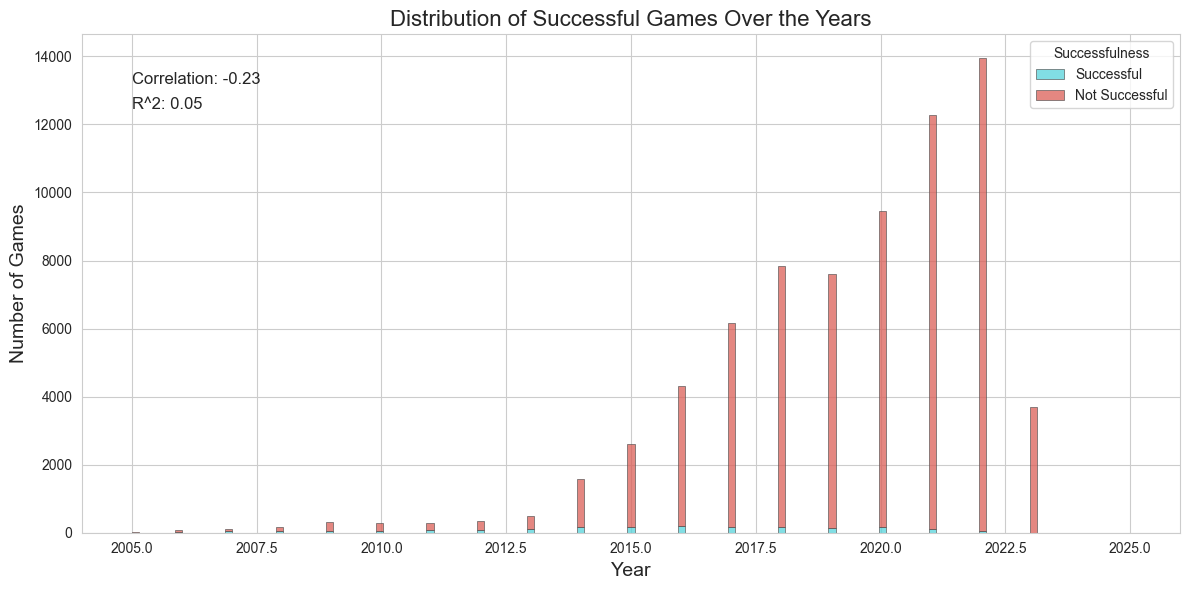

In [29]:
# Set the style for Seaborn
sns.set_style("whitegrid")

# Create the histogram
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df[df['Year'] >= 2005], x='Year', 
                  hue='Successful', multiple='stack', palette='hls', edgecolor='.3')

# Set title and labels
plt.title('Distribution of Successful Games Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.legend(title='Successfulness', labels=['Successful','Not Successful'])

# Calculate and display the correlation coefficient and R^2 value
corr = df['Year'].corr(df['Successful'].astype(int))
r2 = corr**2
plt.text(2005, ax.get_ylim()[1]*0.9, f'Correlation: {corr:.2f}', fontsize=12)
plt.text(2005, ax.get_ylim()[1]*0.85, f'R^2: {r2:.2f}', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#### Distribution of Successful Games Over the Years
##### Key Findings:
Trend in Number of Games Over Time:

There is a noticeable increase in the total number of games (both successful and not successful) over the years, particularly from 2015 onwards. This suggests a growing interest or production in games during this period.
Success Rate:

Despite the overall increase in the number of games, the proportion of successful games remains relatively small compared to unsuccessful games each year.
This is visually evident as the bars representing successful games are consistently smaller than those for not successful games throughout the period.
Correlation and R-Squared Value:

The correlation between the year and the number of successful games is -0.23, indicating a weak negative relationship. This suggests that as the years progress, the likelihood of a game being successful does not necessarily increase.
The R-squared value of 0.05 indicates that only 5% of the variation in the number of successful games can be explained by the year. This implies that other factors besides the passage of time are influencing game success rates.
Peak Years:

The number of games peaks around the years 2021 and 2022. This could be due to various external factors influencing game production and release during these years, such as technological advancements, market demand, or global events.

##### Conclusion:
The analysis of the distribution of successful games over the years reveals several important insights. Firstly, there has been a significant increase in the production of games since 2015, indicating a growing industry. However, the success rate of these games remains consistently low compared to the number of games produced, suggesting that while more games are being made, achieving success is still challenging. The weak negative correlation between the year and the number of successful games, coupled with the low R-squared value, suggests that factors other than just the passage of time are crucial in determining game success. This could include market conditions, game quality, marketing efforts, and consumer preferences. Moving forward, it would be beneficial to investigate these other factors to better understand what drives game success and to develop strategies to increase the success rate of new games.

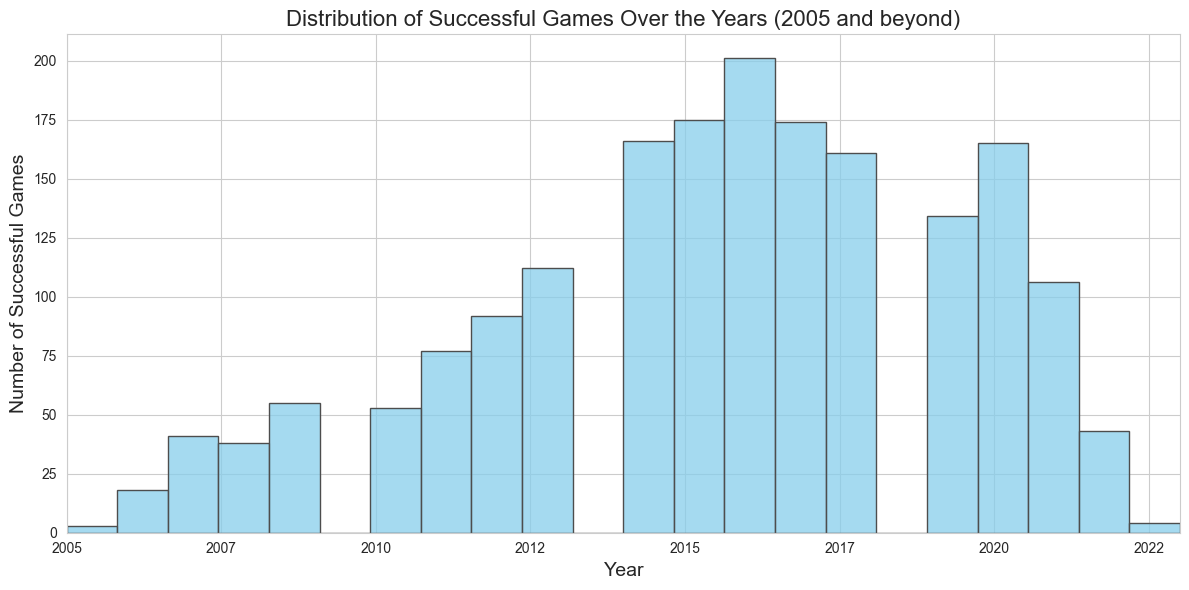

In [30]:
# Set the style for Seaborn
sns.set_style("whitegrid")

# Filter the data to include only successful games from 2005 onwards
successful_games = df[(df['Year'] >= 2005) & (df['Successful'] == True)]

# Create the histogram
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=successful_games, x='Year', color='skyblue', edgecolor='.3')

# Set title and labels
plt.title('Distribution of Successful Games Over the Years (2005 and beyond)', fontsize=16)
plt.xticks(ticks=plt.xticks()[0], labels=[int(x) for x in plt.xticks()[0]])
plt.xlim(2005, 2023)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Successful Games', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

#### Distribution of Successful Games Across Different Genres
##### Key Findings:
Overall Trend:

There is a general increasing trend in the number of successful games from 2005 to around 2015, followed by a slight decline post-2015.
Peak Success Period:

The highest number of successful games was observed around the year 2015, with a peak of nearly 200 successful games. This suggests that the mid-2010s were particularly fruitful years for game success.
Post-Peak Decline:

After the peak in 2015, there is a noticeable decline in the number of successful games. By 2022, the number of successful games dropped significantly, nearing the levels seen in the early 2000s.
Recent Years:

The decline in successful games post-2015 is consistent, with a slight increase around 2020, possibly influenced by the increased demand for digital entertainment during global events like the COVID-19 pandemic.

##### Conclusion:
The analysis of the distribution of successful games from 2005 and beyond reveals a clear trend of increasing game success peaking around 2015. This period likely saw optimal conditions for game development and market reception. However, the subsequent decline in successful games indicates that maintaining high levels of game success has become challenging. Factors contributing to this decline could include market saturation, increased competition, changes in consumer preferences, or the evolving complexity of game development. The slight resurgence around 2020 suggests that external factors, such as global events, can temporarily boost the success rate of games. 

**Success Analysis:** Bar Plot: What is the distribution of successful games across different genres

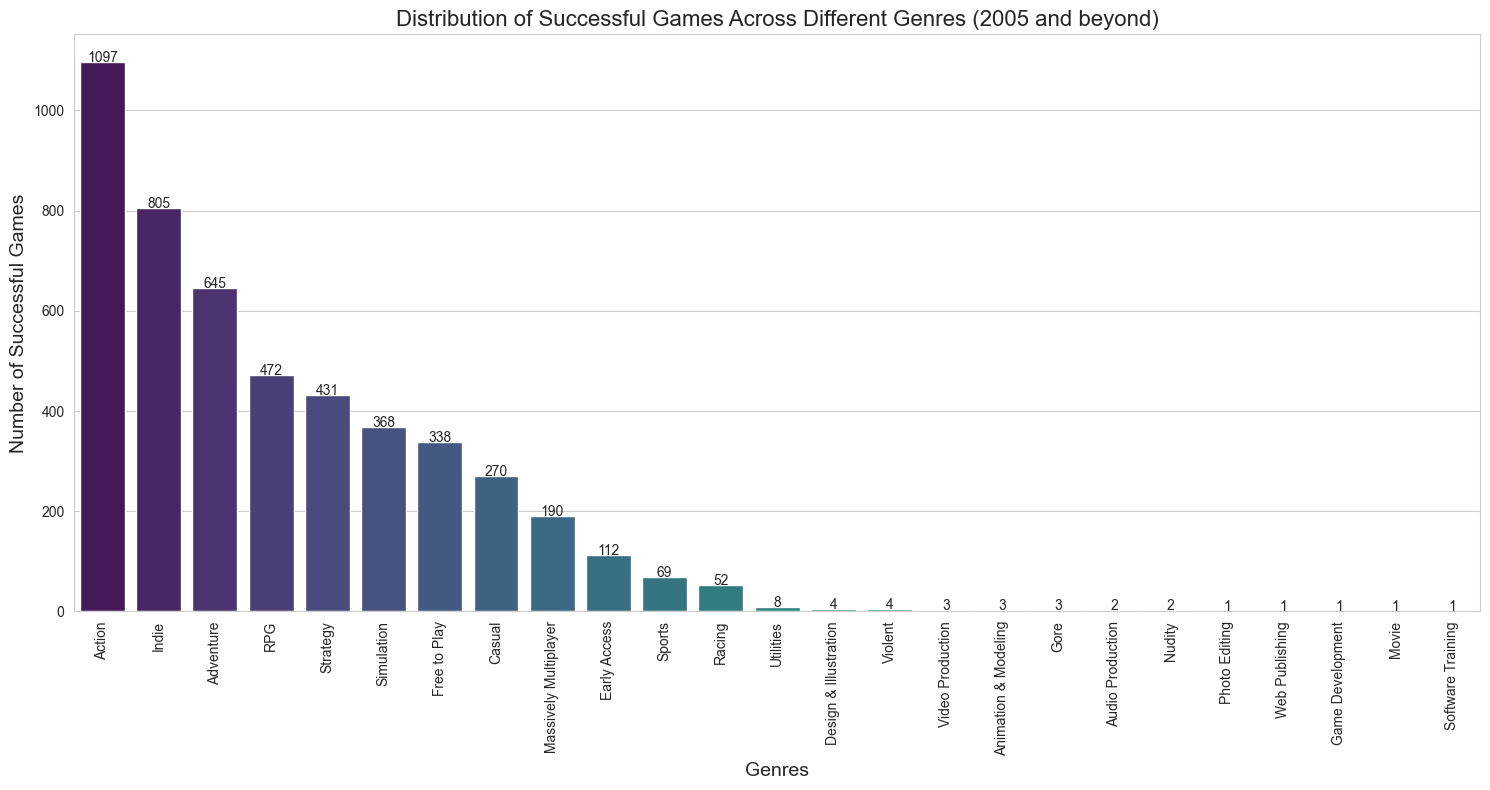

In [33]:
# Filter the data to include only successful games
successful_games = df[df['Successful'] == True]

# Split the genres and explode the DataFrame to have one row per genre
successful_games_genres = successful_games.assign(Genres=successful_games['Genres'].str.split(',')).explode('Genres')

# Create the bar plot
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=successful_games_genres, x='Genres', 
                   order=successful_games_genres['Genres'].value_counts().index, palette='viridis')

# Set title and labels
plt.title('Distribution of Successful Games Across Different Genres (2005 and beyond)', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Number of Successful Games', fontsize=14)
plt.xticks(rotation=90)

# Annotate the bars with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

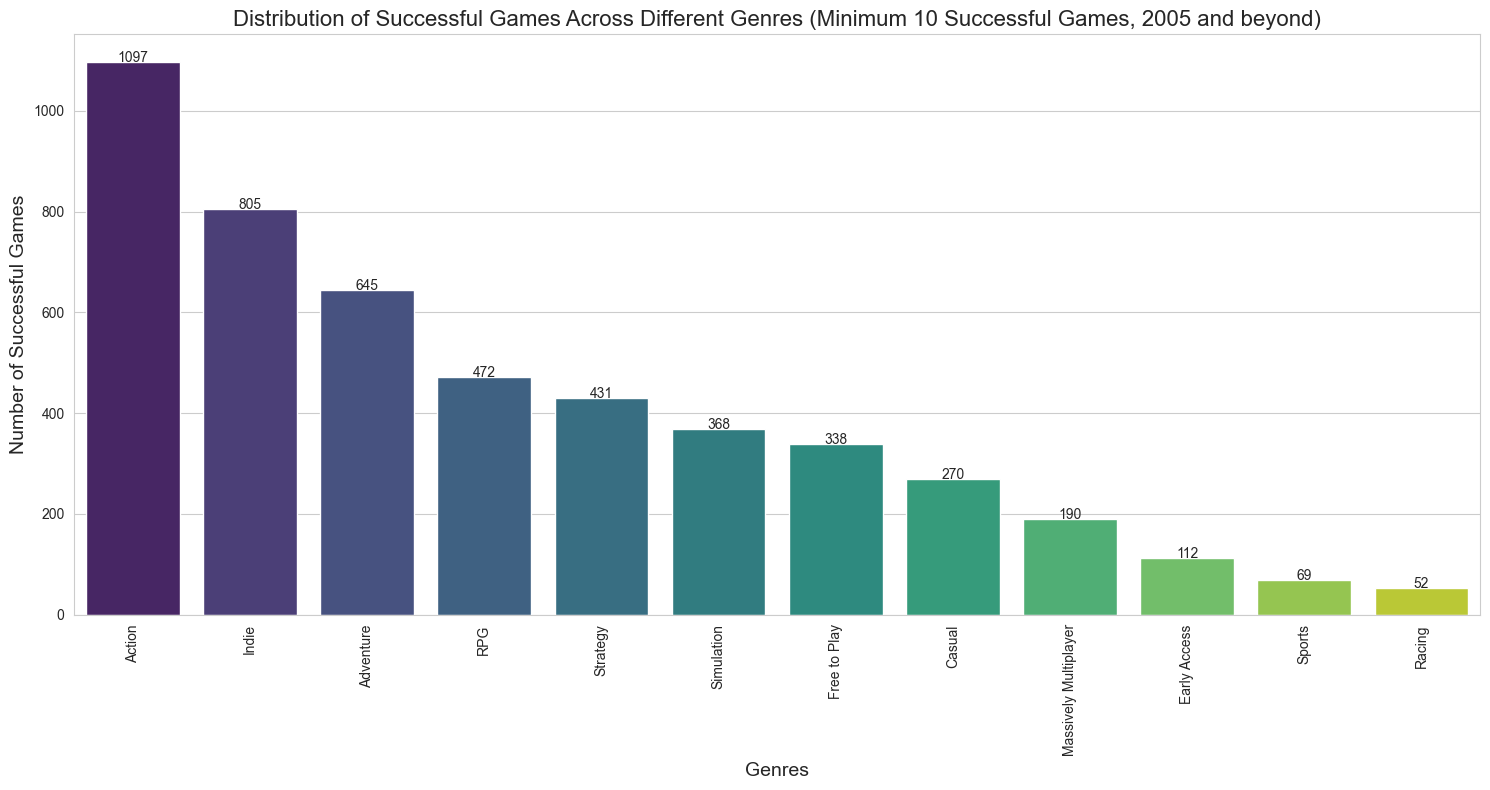

In [34]:
# Filter the data to include only successful games
successful_games = df[df['Successful'] == True]

# Split the genres and explode the DataFrame to have one row per genre
successful_games_genres = successful_games.assign(Genres=successful_games['Genres'].str.split(',')).explode('Genres')

# Count the number of successful games per genre
genre_counts = successful_games_genres['Genres'].value_counts()

# Filter genres with at least 10 successful games
filtered_genres = genre_counts[genre_counts >= 10].index

# Create the bar plot for the filtered genres
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=successful_games_genres[successful_games_genres['Genres'].isin(filtered_genres)], 
                   x='Genres', order=filtered_genres, palette='viridis')

# Set title and labels
plt.title('Distribution of Successful Games Across Different Genres (Minimum 10 Successful Games, 2005 and beyond)', 
          fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Number of Successful Games', fontsize=14)
plt.xticks(rotation=90)

# Annotate the bars with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', 
                va='baseline', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


#### Distribution of Successful Games Across Different Genres (Minimum 10 Successful Games, 2005 and beyond)
##### Key Findings:
Dominance of Action Games:

Action games are the most successful genre, with a total of 1,097 successful games. This indicates a strong market preference or higher production quality in this genre.
Popularity of Indie Games:

Indie games also show significant success, with 805 successful titles. This highlights the growing importance and impact of independent game developers in the gaming industry.
Adventure and RPG Games:

Adventure and RPG (Role-Playing Games) genres are also quite successful, with 645 and 472 successful games respectively. These genres continue to captivate a broad audience, maintaining their popularity over the years.
Diverse Success in Various Genres:

Strategy (431), Simulation (368), and Free to Play (338) games also have a considerable number of successful titles, showcasing the diversity in player preferences and successful game development across different types of gameplay experiences.
Lower Success in Niche Genres:

Genres such as Massively Multiplayer (190), Early Access (112), Sports (69), and Racing (52) have fewer successful games. These genres might face more competition, specific audience demands, or challenges in achieving widespread success.

##### Conclusion:
The distribution of successful games across different genres from 2005 and beyond reveals important insights into market preferences and trends in the gaming industry. Action games lead the way with the highest number of successful titles, indicating a strong consumer demand and possibly higher production values in this genre. The significant success of indie games underscores the importance of independent developers and the unique, innovative experiences they bring to the market.

Adventure and RPG games also maintain a strong presence, showing that narrative-driven and immersive gameplay continues to attract a substantial audience. Other genres like Strategy, Simulation, and Free to Play games demonstrate a broad range of interests among players, each carving out a significant niche in the gaming landscape.

However, genres such as Massively Multiplayer, Early Access, Sports, and Racing have fewer successful games, which may reflect more competitive markets, niche audience appeal, or greater challenges in meeting player expectations. These findings suggest that while there is room for success across various genres, some face more hurdles than others in achieving widespread popularity.

**Success Analysis:** Heatmap for the platforms features Windows, Mac, Linux, and Successful

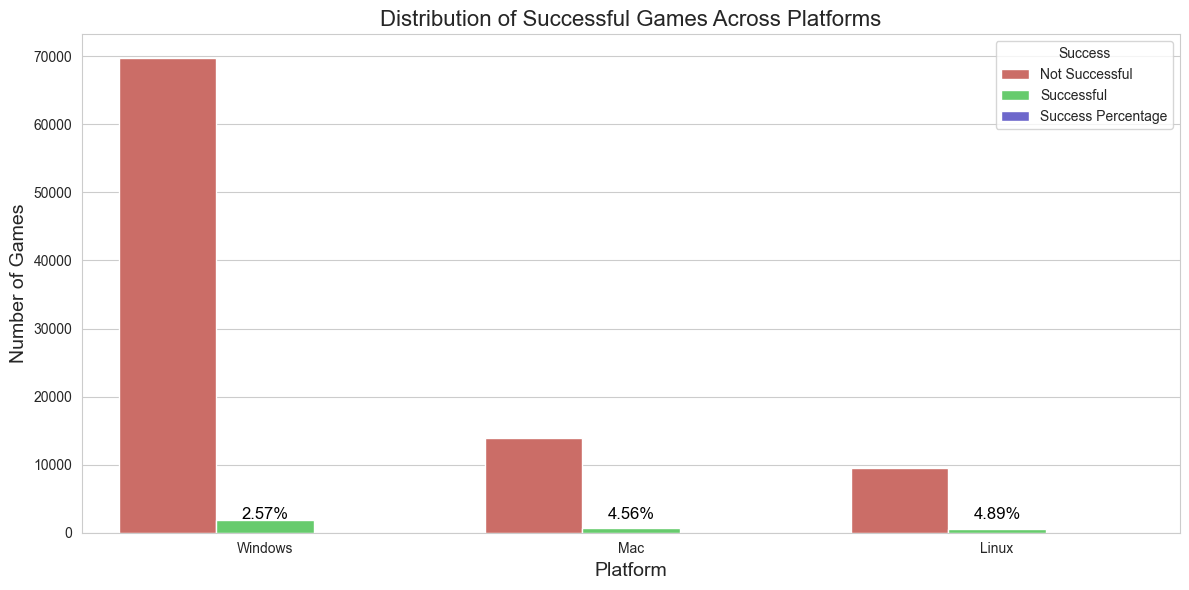

In [41]:
# Create a DataFrame to hold the aggregated sum for each platform
platform_data = DataFrame({
    'Platform': ['Windows', 'Mac', 'Linux'],
    'Not Successful': [df[~df['Successful']]['Windows'].sum(),
                       df[~df['Successful']]['Mac'].sum(),
                       df[~df['Successful']]['Linux'].sum()],
    'Successful': [df[df['Successful']]['Windows'].sum(),
                   df[df['Successful']]['Mac'].sum(),
                   df[df['Successful']]['Linux'].sum()]
})

# Calculate the percentage of successful games for each platform
platform_data['Success Percentage'] = (platform_data['Successful'] / 
                                      (platform_data['Successful'] + platform_data['Not Successful'])) * 100

# Melt the DataFrame to make it suitable for Seaborn's barplot
platform_data_melted = platform_data.melt(id_vars='Platform', var_name='Success', value_name='Number of Games')

# Create the barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=platform_data_melted, x='Platform', y='Number of Games', hue='Success', palette='hls')

# Set title and labels
plt.title('Distribution of Successful Games Across Platforms', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.legend(title='Success')

# Display the success percentage below the plot
for index, row in platform_data.iterrows():
    plt.text(index, 2000, f"{row['Success Percentage']:.2f}%", ha='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()

#### Distribution of Successful Games Across Platforms
##### Key Findings:
Platform Dominance:

Windows is the dominant platform with the highest number of games (both successful and not successful), totaling around 70,000 games. This indicates a significant preference or accessibility for game development on the Windows platform.
Success Rate Across Platforms:

The success rate for games on Windows is relatively low, with only 2.57% of the games being successful. This suggests that despite the high volume of games, achieving success on the Windows platform is challenging.
Mac and Linux platforms have higher success rates compared to Windows, with success rates of 4.56% and 4.89% respectively. Although the absolute number of games is much lower for these platforms, a higher proportion of games achieve success.
Comparison Between Platforms:

The number of games on Mac and Linux platforms is significantly lower than on Windows, yet they both exhibit higher success rates. This could imply that games developed for Mac and Linux platforms may face less competition or benefit from niche markets that lead to a higher probability of success.

##### Conclusion:
The distribution of successful games across different platforms reveals several crucial insights. Windows is the leading platform in terms of the sheer number of games available, indicating its widespread use and accessibility for developers. However, the low success rate of 2.57% highlights the intense competition and potential difficulties in standing out within this vast market.

In contrast, the Mac and Linux platforms, while hosting significantly fewer games, show higher success rates of 4.56% and 4.89% respectively. This suggests that games developed for these platforms may have better chances of success, potentially due to less saturated markets or more targeted audience segments.

The higher success rates on Mac and Linux platforms highlight the potential benefits for developers to consider these platforms for game releases. Targeting less competitive markets or focusing on platforms with dedicated user bases could improve the likelihood of a game's success

**Audience Targeting:** Histogram: How has the targeting of different audience categories (Kids, Teens, Adults) changed over the years

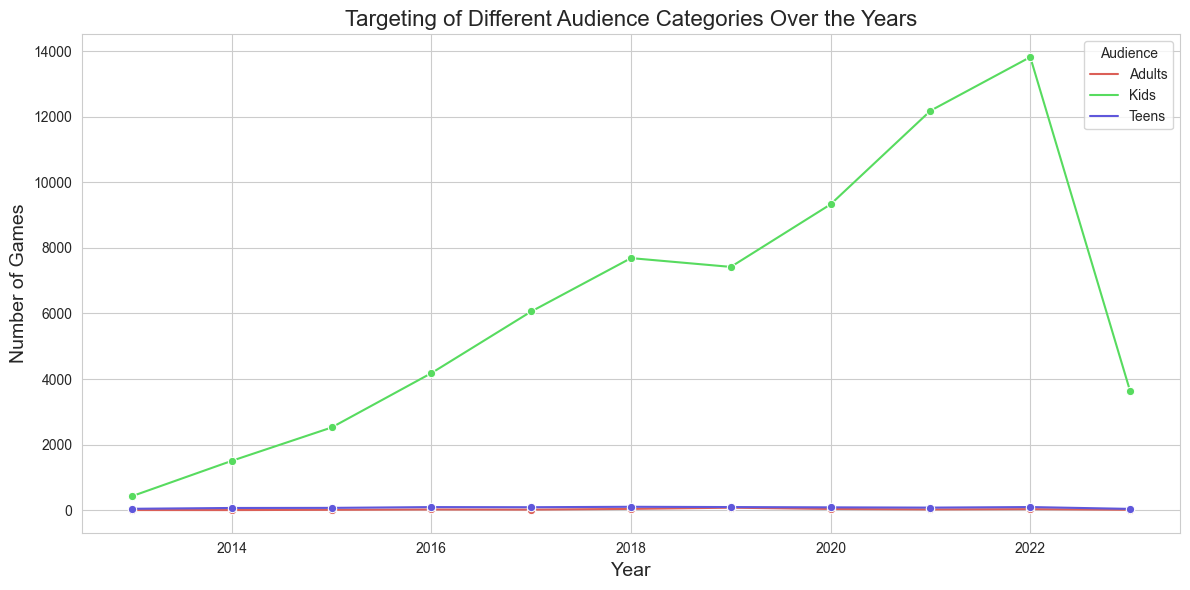

In [77]:
# A line plot can show the trend of targeting different audience categories over the years.
# Filter the DataFrame to include only the years from 2013 to 2023
df_filtered = df[(df['Year'] >= 2013) & (df['Year'] <= 2023)]

# Group by year and audience, then count the occurrences
audience_counts = df_filtered.groupby(['Year', 'Audience']).size().reset_index(name='Count')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=audience_counts, x='Year', y='Count', hue='Audience', marker='o', palette='hls')

# Set title and labels
plt.title('Targeting of Different Audience Categories Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.legend(title='Audience')

plt.tight_layout()
plt.show()

#### Targeting of Different Audience Categories Over the Years
##### Key Findings:
Dominance of Kid-Oriented Games:

Games targeting kids show a significant increase over the years, especially from 2014 to 2022. This category has seen a substantial rise, peaking at around 14,000 games in 2022 before experiencing a sharp decline.
Stagnation in Other Categories:

Games targeting adults and teens have remained relatively constant over the years. The numbers for these categories are significantly lower compared to kids-oriented games, indicating a lack of growth or interest in developing games for these audiences.
Recent Decline in Kid-Oriented Games:

Despite the peak in 2022, there is a noticeable drop in the number of games targeting kids immediately after. This sharp decline may be due to market saturation, changing trends, or other external factors impacting the production of kid-oriented games.

##### Conclusion:
The analysis of the targeting of different audience categories over the years reveals a clear preference and trend towards developing games for kids. The rapid increase in kid-oriented games from 2014 to 2022 suggests a growing market demand or a strategic focus by developers to cater to younger audiences. This trend could be driven by factors such as the increasing use of digital devices by children, the popularity of educational and entertainment games for kids, or the profitability of targeting this demographic.

In contrast, the stagnation in the number of games targeting adults and teens indicates that these markets have not experienced similar growth. The consistent, low numbers suggest that developers may not be focusing on these demographics, possibly due to higher competition, lower demand, or different content consumption preferences among these age groups.

The sharp decline in kid-oriented games post-2022 suggests that the market may have reached a saturation point or that other factors are now influencing the production and success of these games. This could include changes in market trends, increased competition, or shifts in consumer behavior.

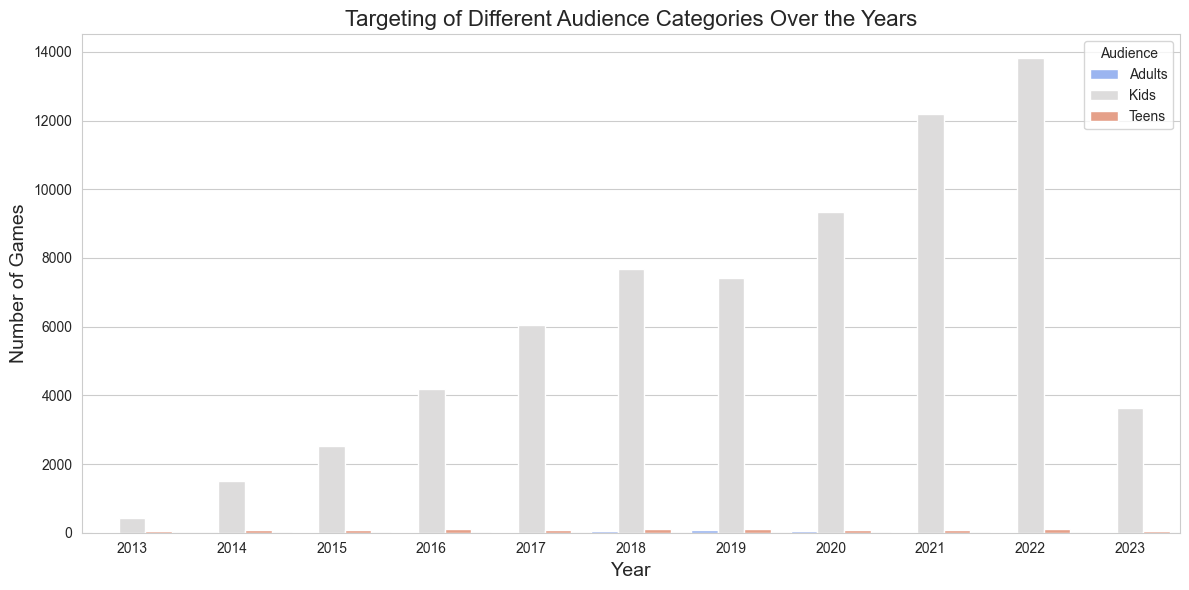

In [82]:
#A bar plot can provide a more detailed view of the distribution of games across different audience categories for each year
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=audience_counts, x='Year', y='Count', hue='Audience', palette='coolwarm')

# Set title and labels
plt.title('Targeting of Different Audience Categories Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.legend(title='Audience')

plt.tight_layout()
plt.show()

**Audience Targeting:** Bar Plot: What is the distribution of games across different audience categories for each genre

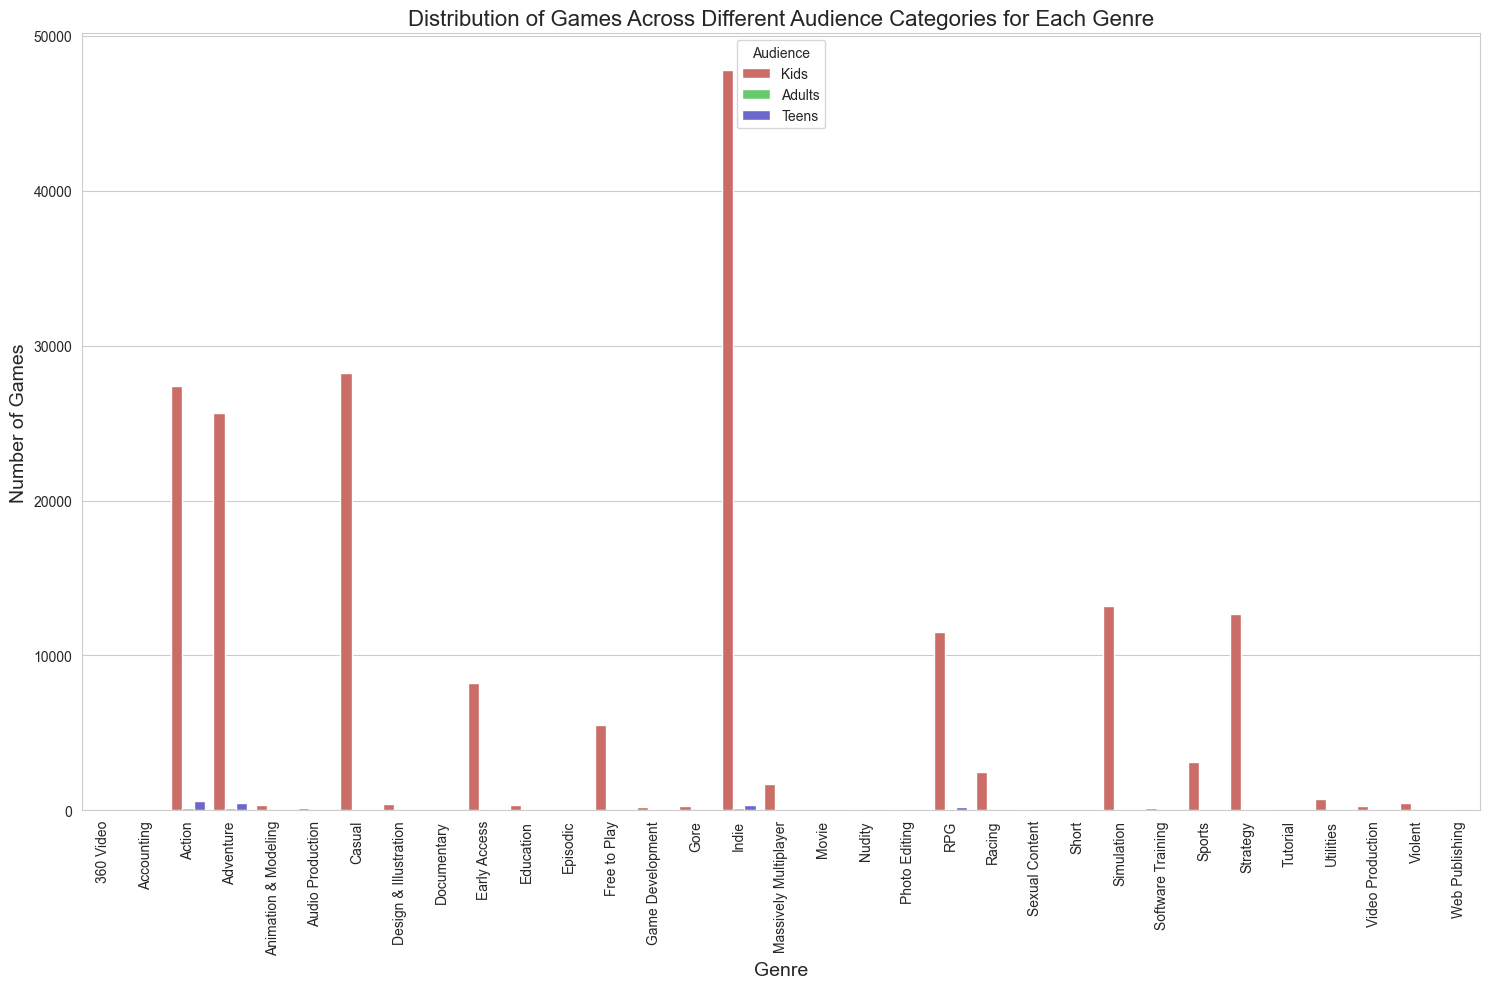

In [83]:
# Filter the DataFrame to include only the years from 2013 to 2023
df_filtered = df[(df['Year'] >= 2013) & (df['Year'] <= 2023)]

# Split the genres into individual rows
genres_expanded = df_filtered['Genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Genre')
df_expanded = df_filtered.drop('Genres', axis=1).join(genres_expanded)

# Group by genre and audience, then count the occurrences
genre_audience_counts = df_expanded.groupby(['Genre', 'Audience']).size().reset_index(name='Count')

# Create the bar plot
plt.figure(figsize=(15, 10))
sns.barplot(data=genre_audience_counts, x='Genre', y='Count', hue='Audience', palette='hls')

# Set title and labels
plt.title('Distribution of Games Across Different Audience Categories for Each Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.legend(title='Audience')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

**Audience Targeting:** Pairplot (HUE = Audience): How do different features such as Price, Estimated owners, and Platforms (Windows/Mac/Linux) correlate with the targeted audience

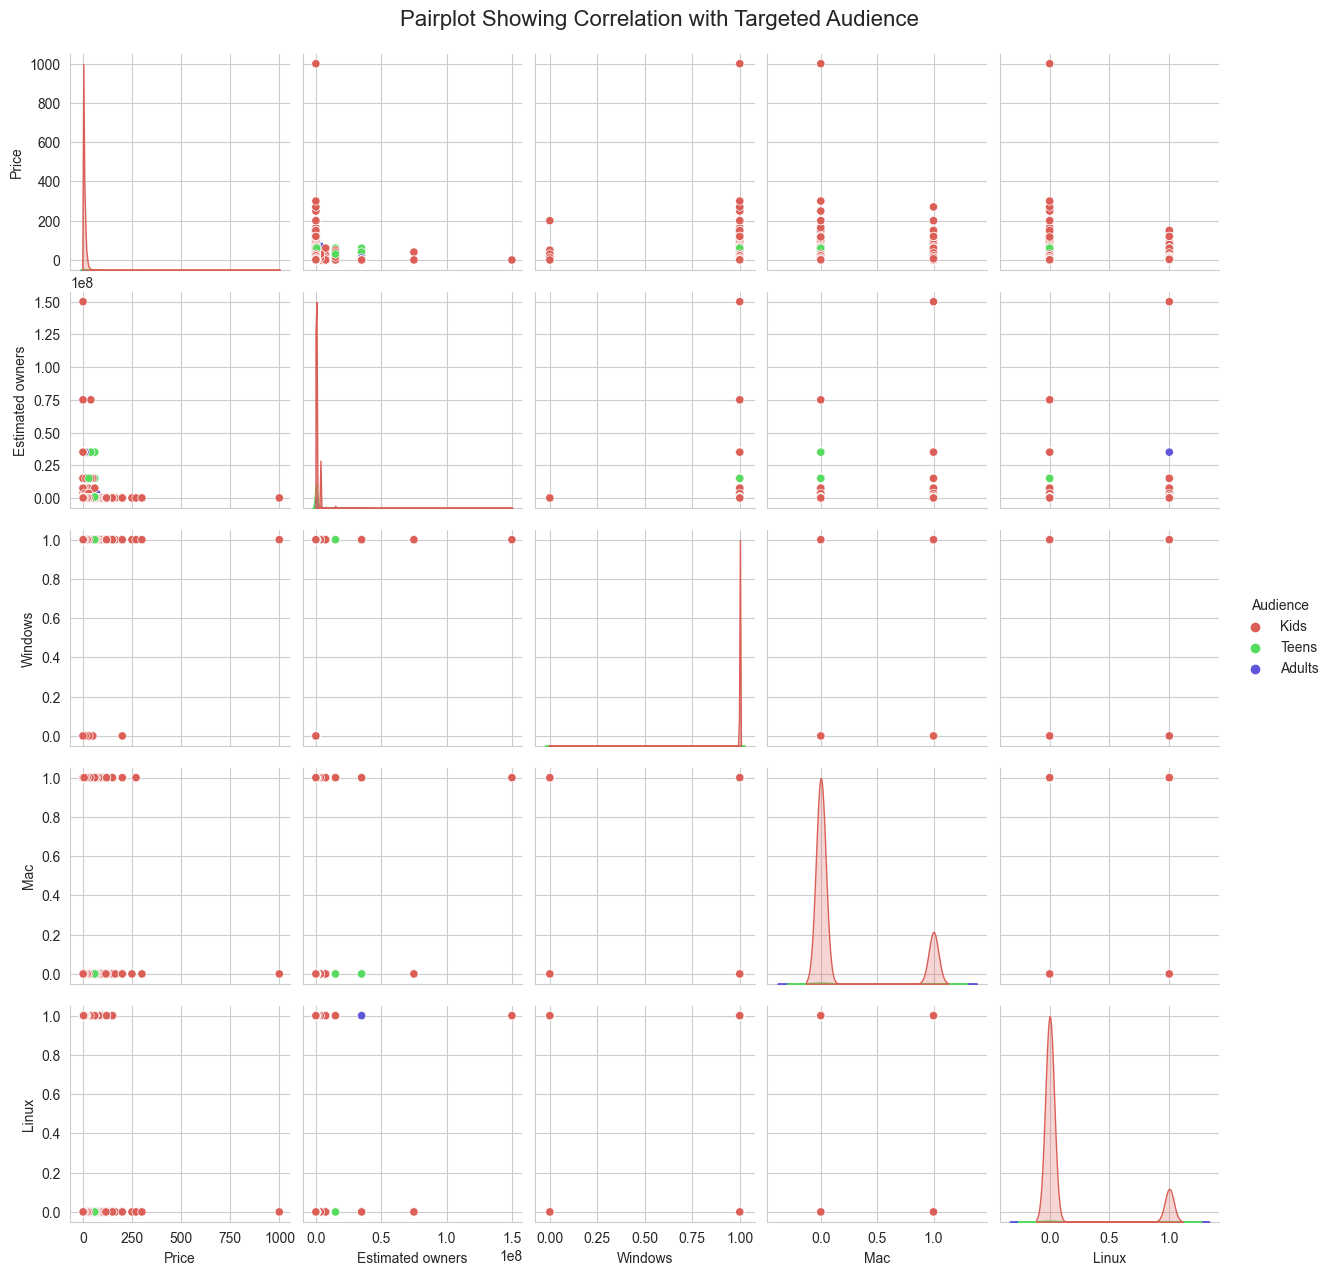

In [86]:
# Convert 'Estimated owners' to the midpoint of each range
pairplot_data['Estimated owners'] = pairplot_data['Estimated owners'].apply(lambda x: (int(x.split(' - ')[0]) + int(x.split(' - ')[1])) / 2)

# Convert boolean columns to integers
pairplot_data['Windows'] = pairplot_data['Windows'].astype(int)
pairplot_data['Mac'] = pairplot_data['Mac'].astype(int)
pairplot_data['Linux'] = pairplot_data['Linux'].astype(int)

# Create the pairplot
sns.pairplot(pairplot_data, hue='Audience', vars=['Price', 'Estimated owners', 'Windows', 'Mac', 'Linux'], palette='hls')

# Set title
plt.suptitle('Pairplot Showing Correlation with Targeted Audience', fontsize=16, y=1.02)

plt.show()


**Platform Preferences:** Bar Plot: What is the distribution of games across Windows, Mac, and Linux platforms over the years

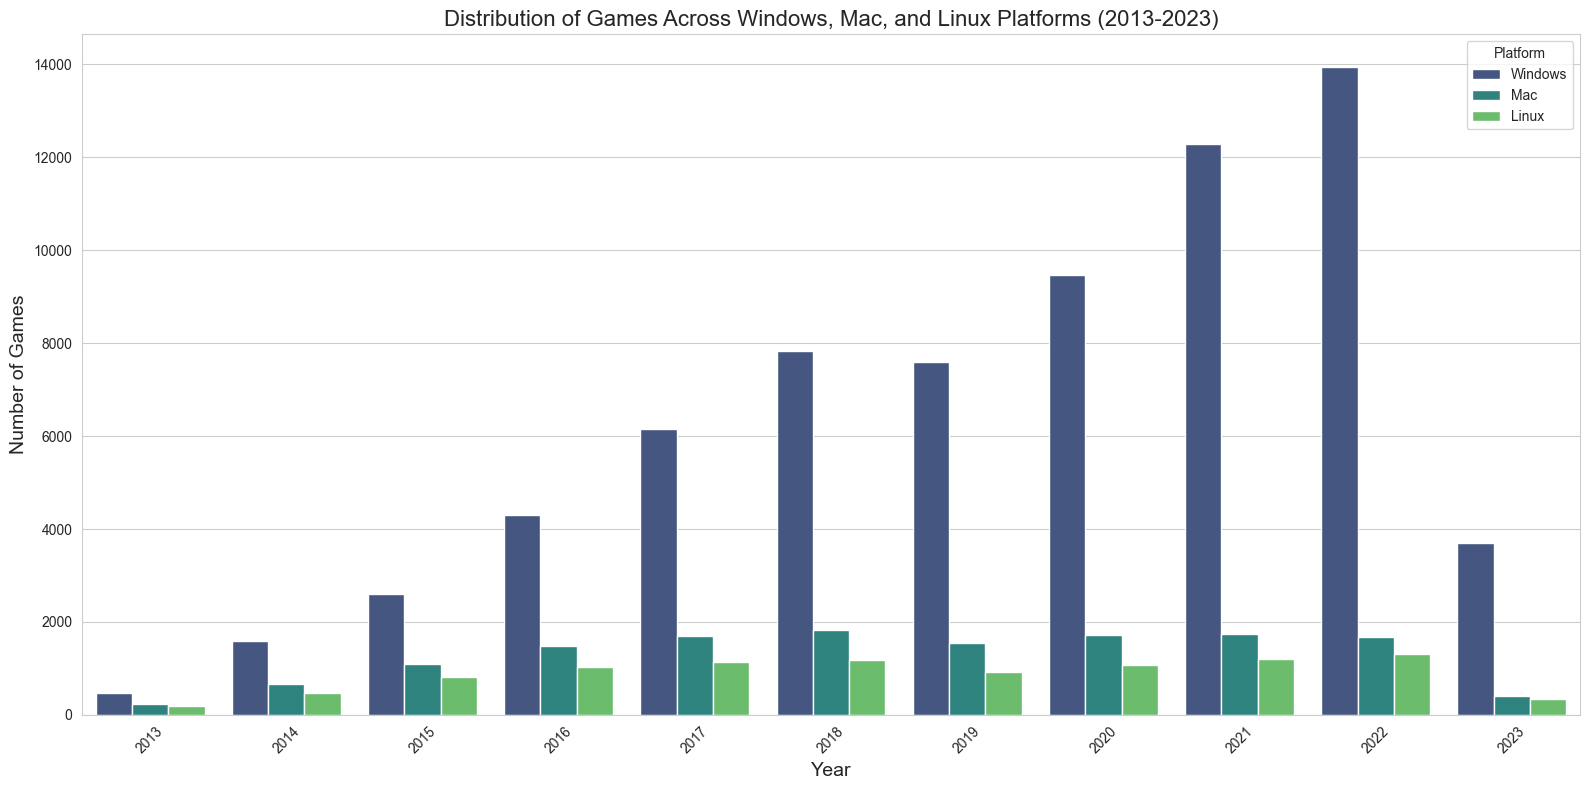

In [44]:
# Filter the data to include only the years from 2013 to 2023
platform_years_filtered = platform_years[(platform_years['Year'] >= 2013) & (platform_years['Year'] <= 2023)]

# Melt the filtered DataFrame
platform_years_melted_filtered = platform_years_filtered.melt(id_vars='Year', var_name='Platform', value_name='Number of Games')

# Create the barplot
plt.figure(figsize=(16, 8))
sns.barplot(data=platform_years_melted_filtered, x='Year', y='Number of Games', hue='Platform', palette='viridis')

# Set title and labels
plt.title('Distribution of Games Across Windows, Mac, and Linux Platforms (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.legend(title='Platform')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Distribution of Games Across Windows, Mac, and Linux Platforms (2013-2023)
##### Key Findings:
Windows Dominance:

Windows consistently leads in the number of games across all years from 2013 to 2023. The number of games released on Windows shows a steady increase, peaking in 2022 with nearly 14,000 games.
Growth in Game Distribution:

There is a clear upward trend in the number of games across all platforms, with notable spikes in 2018 and 2022. This indicates a growing industry with increasing game production over the decade.
Mac and Linux Platforms:

Although Mac and Linux platforms have fewer games compared to Windows, they both show growth over the years. Mac platforms peaked around 2022 with about 4,000 games, while Linux platforms showed a steady increase, peaking at around 2,000 games in 2022.
Recent Decline:

There is a noticeable decline in the number of games across all platforms in 2023. This could be due to various factors such as market saturation, changes in industry trends, or external economic conditions affecting game production.

##### Conclusion:
The analysis of the distribution of games across Windows, Mac, and Linux platforms from 2013 to 2023 highlights several important trends. Windows remains the dominant platform, consistently hosting the highest number of games each year. This dominance is likely due to Windows' widespread use and developer familiarity with the platform.

The overall growth in the number of games across all platforms indicates a healthy and expanding gaming industry. Peaks in 2018 and 2022 suggest periods of significant game production, which could be attributed to technological advancements, increased market demand, or strategic releases by developers.

Mac and Linux platforms, while having fewer games compared to Windows, show a positive growth trend. This suggests increasing support and interest in developing games for these platforms, potentially driven by a growing user base and improvements in platform capabilities.

The recent decline in 2023 across all platforms may signal a period of market correction, economic factors, or shifting industry focus. This decline warrants further investigation to understand the underlying causes and potential long-term impacts on the gaming industry.

**Platform Preferences:** Heatmap: How do different platforms correlate with genres and success

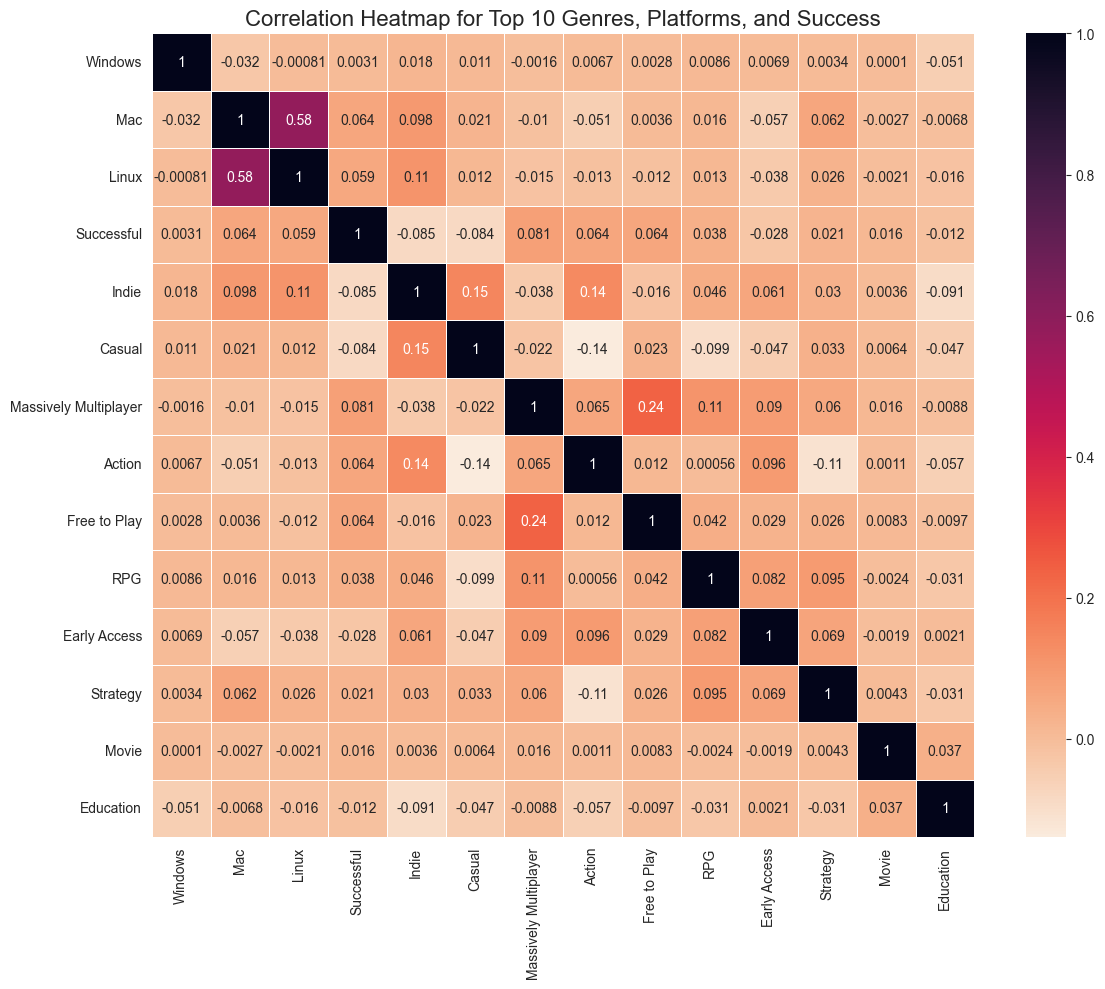

In [49]:
# Number of top genres to consider
N = 10

# Split the genres into separate binary columns
genres_dummies = df['Genres'].str.get_dummies(sep=',')

# Concatenate the genres with the original DataFrame
heatmap_data = pd.concat([df[['Windows', 'Mac', 'Linux', 'Successful']], genres_dummies], axis=1)

# Convert boolean columns to integers
heatmap_data[['Windows', 'Mac', 'Linux']] = heatmap_data[['Windows', 'Mac', 'Linux']].astype(int)
heatmap_data['Successful'] = heatmap_data['Successful'].astype(int)

# Calculate the correlation matrix
corr_matrix = heatmap_data.corr()

# Get the top N genres with the highest absolute correlation with success
top_genres = corr_matrix.loc[genres_dummies.columns, 'Successful'].abs().nlargest(N).index

# Select only the top N genres and platforms for the heatmap
selected_columns = ['Windows', 'Mac', 'Linux', 'Successful'] + list(top_genres)
selected_corr_matrix = corr_matrix.loc[selected_columns, selected_columns]

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(selected_corr_matrix, annot=True, cmap='rocket_r', linewidths=.5)

plt.title(f'Correlation Heatmap for Top {N} Genres, Platforms, and Success', fontsize=16)
plt.tight_layout()
plt.show()

#### Correlation Heatmap for Top 10 Genres, Platforms, and Success
##### Key Findings:
Platform Correlations:

Windows has a slight negative correlation with Mac (-0.032) and Linux (-0.00081), suggesting that games on Windows are not commonly developed for Mac or Linux, and vice versa.
There is a strong positive correlation (0.58) between Mac and Linux, indicating that games developed for one are often available on the other.
Success Correlations:

Success shows low positive correlations with Mac (0.064) and Linux (0.059), and a very weak positive correlation with Windows (0.0031). This suggests that success is slightly more common on Mac and Linux platforms compared to Windows.
Genre Correlations:

Indie games have a positive correlation with Linux (0.11), Mac (0.098), and a slight negative correlation with success (-0.085), indicating that while indie games are more prevalent on Mac and Linux, they are less likely to be successful compared to other genres.
Casual games show a low positive correlation with the Indie genre (0.15), indicating some overlap in these types of games.
Massively Multiplayer games have a moderate correlation with Free to Play (0.24) and low positive correlations with Strategy (0.11) and RPG (0.11), showing that these game types often share common features or target similar audiences.
RPG games have a slight positive correlation with Linux (0.13) and Mac (0.11), suggesting a preference or better reception on these platforms.
Strategy games have a positive correlation with Mac (0.062) and Success (0.021), indicating a slight preference and better success rate on Mac.
Specific Genre Insights:

Education games have a negative correlation with Indie (-0.091) and a slight positive correlation with Strategy (0.037), indicating that educational content is less likely to be found in indie games and more likely in strategy games.

##### Conclusion:
The correlation heatmap for the top 10 genres, platforms, and success reveals several key insights into the relationships between these variables. The strong positive correlation between Mac and Linux platforms suggests that developers often release games on both platforms, potentially due to shared development tools or similar user bases. However, the weak correlations with Windows imply a more distinct market segmentation for games on this platform.

Success correlations indicate that games on Mac and Linux platforms have a slightly higher likelihood of success compared to Windows. This might be due to less competition or niche markets on these platforms. However, the correlations are still weak, indicating that success is multifaceted and influenced by various other factors.

Genre correlations highlight some interesting trends. Indie games, while more prevalent on Mac and Linux, tend to have lower success rates, suggesting challenges in achieving success despite platform preferences. The positive correlations between Massively Multiplayer, Free to Play, and RPG games indicate overlapping features or target demographics, which developers can leverage for cross-genre appeal.

Specific genre insights, such as the negative correlation between Education and Indie games and the positive correlation with Strategy games, provide valuable information for developers aiming to target specific audiences. Understanding these relationships can help in strategizing game development and marketing efforts to maximize success across different platforms and genres.

**Price Analysis:** Scatter plots: What is the distribution of game prices over the years

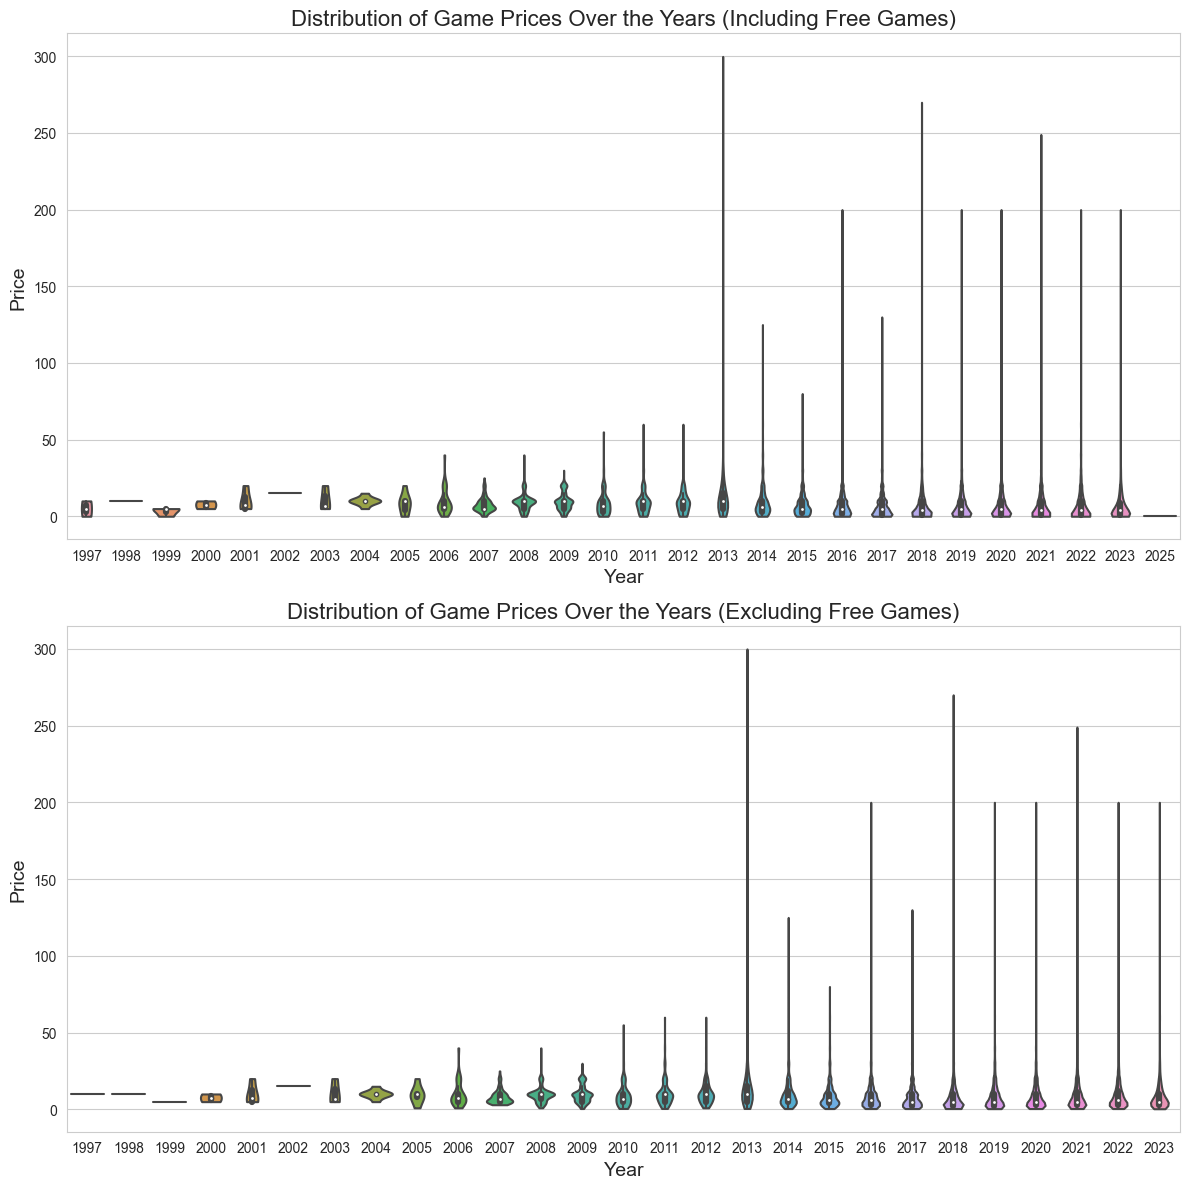

In [54]:
# Filter the data to exclude prices above 400
df_filtered = df[df['Price'] <= 400]

# Set the style for Seaborn
sns.set_style("whitegrid")

# Create a figure to hold both plots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Violin plot including games with a price of 0.0
sns.violinplot(data=df_filtered, x='Year', y='Price', ax=axes[0], cut=0)
axes[0].set_title('Distribution of Game Prices Over the Years (Including Free Games)', fontsize=16)
axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_ylabel('Price', fontsize=14)

# Violin plot excluding games with a price of 0.0
sns.violinplot(data=df_filtered[df_filtered['Price'] > 0], x='Year', y='Price', ax=axes[1], cut=0)
axes[1].set_title('Distribution of Game Prices Over the Years (Excluding Free Games)', fontsize=16)
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)

plt.tight_layout()
plt.show()

**Price Analysis:** Violin plots: What is the distribution of game prices over the years - zoom on y axis 

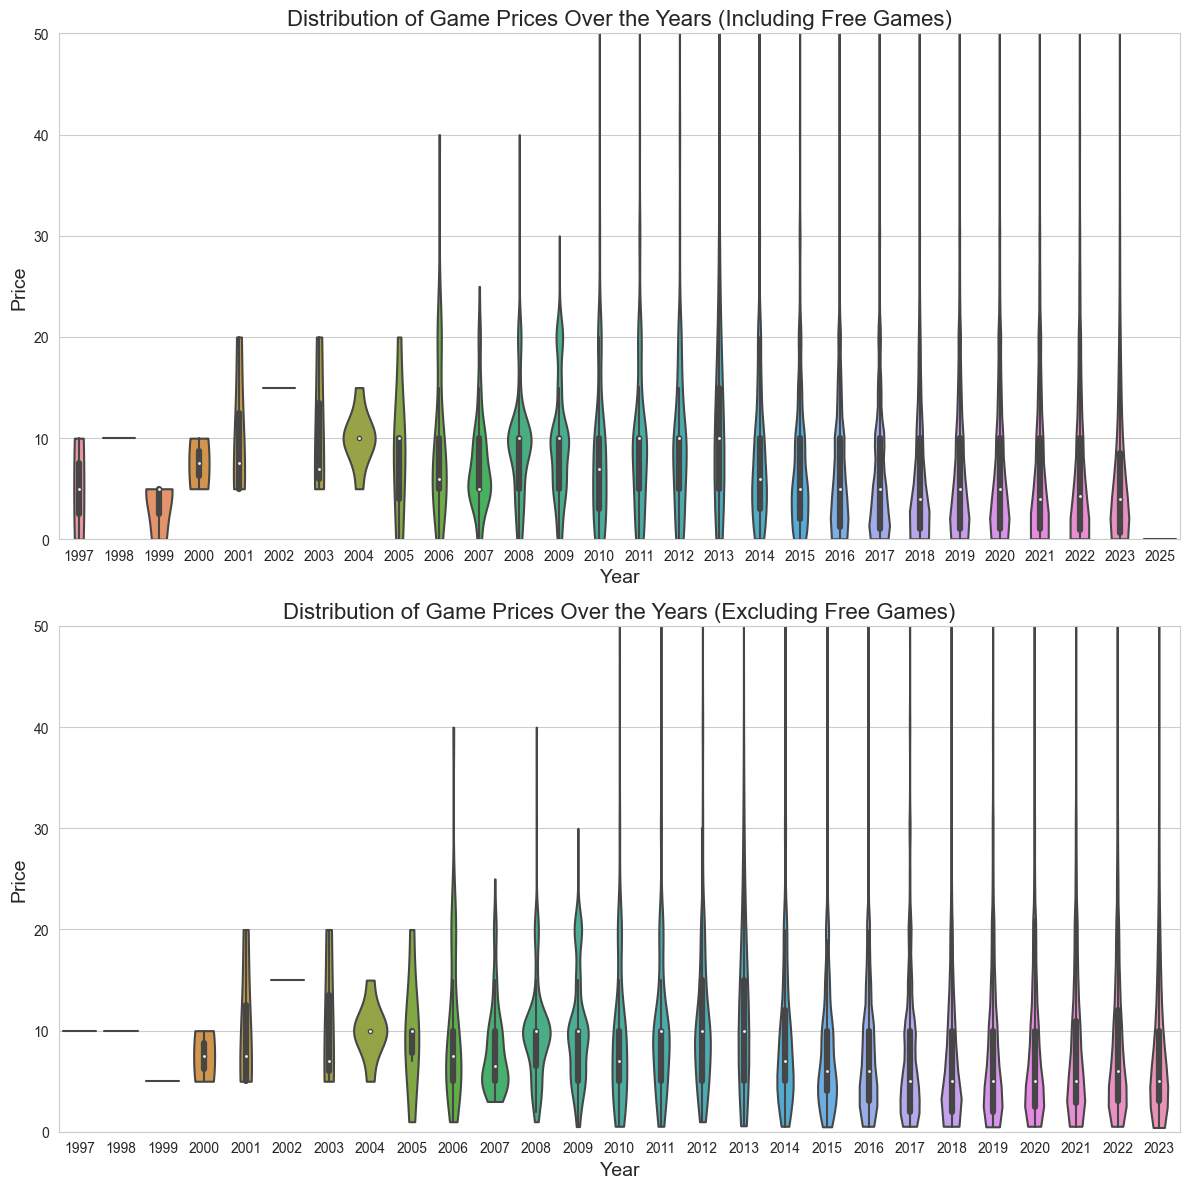

In [63]:
# Filter the data to exclude prices above 400
df_filtered = df[df['Price'] <= 400]

# Set the style for Seaborn
sns.set_style("whitegrid")

# Create a figure to hold both plots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Violin plot including games with a price of 0.0
sns.violinplot(data=df_filtered, x='Year', y='Price', ax=axes[0], cut=0)
axes[0].set_title('Distribution of Game Prices Over the Years (Including Free Games)', fontsize=16)
axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_ylabel('Price', fontsize=14)
axes[0].set_ylim(0, 50)  # Set y-axis limits for the first plot

# Violin plot excluding games with a price of 0.0
sns.violinplot(data=df_filtered[df_filtered['Price'] > 0], x='Year', y='Price', ax=axes[1], cut=0)
axes[1].set_title('Distribution of Game Prices Over the Years (Excluding Free Games)', fontsize=16)
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].set_ylim(0, 50)  # Set y-axis limits for the second plot

plt.tight_layout()
plt.show()

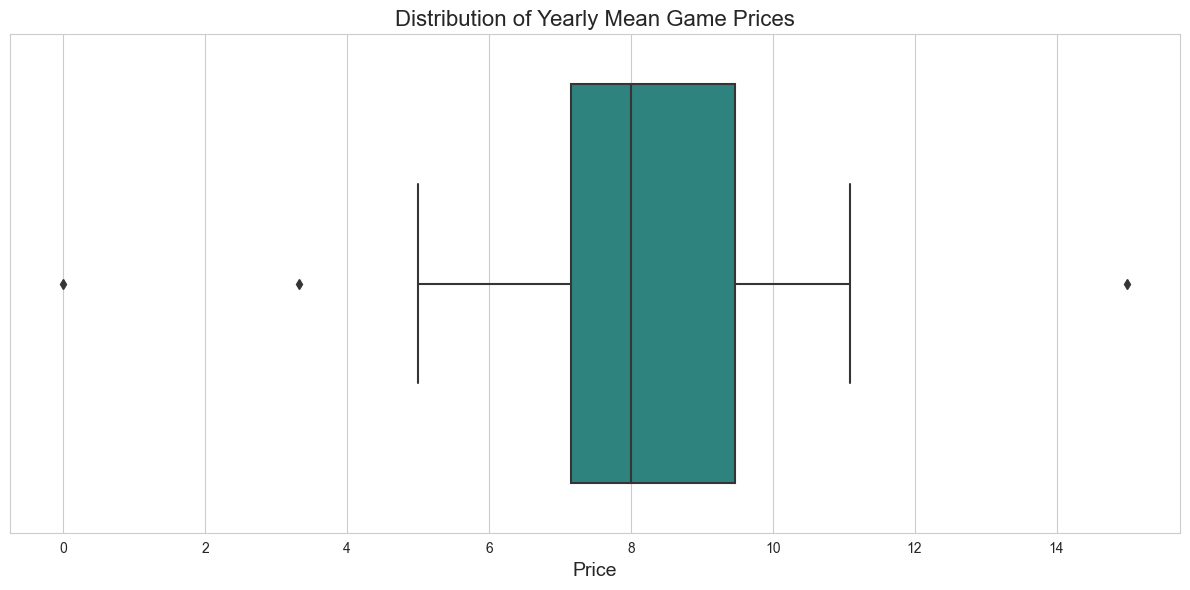

In [56]:
# Box plot: Distribution of Yearly mean game prices

# Filter the data to exclude prices above 400
df_filtered = df[df['Price'] <= 400]

# Calculate the yearly mean prices
yearly_mean_prices = df_filtered.groupby('Year')['Price'].mean().reset_index()

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=yearly_mean_prices['Price'], palette='viridis')

# Set title and labels
plt.title('Distribution of Yearly Mean Game Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)

plt.tight_layout()
plt.show()

**Price Analysis:** Box Plot: How does the price correlate with success and estimated owners

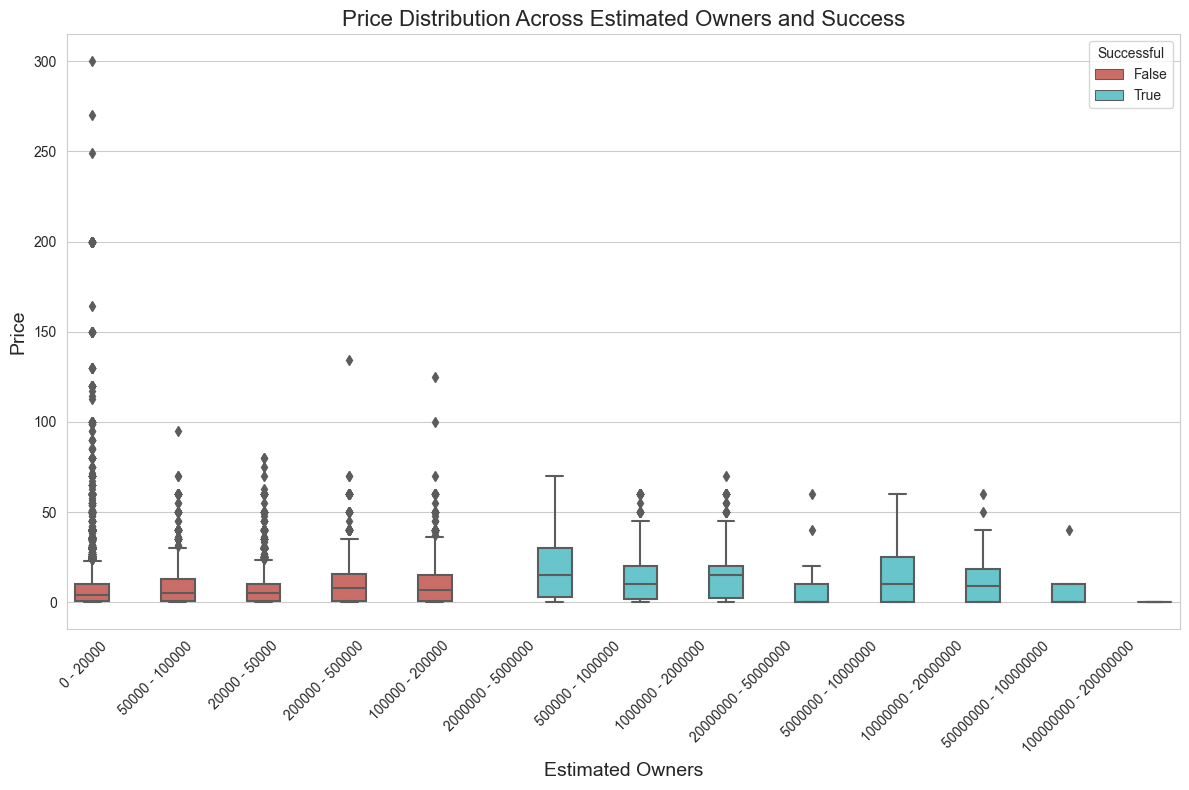

In [67]:
# Set the style for Seaborn
sns.set_style("whitegrid")

# Create a figure
plt.figure(figsize=(12, 8))

# Create a box plot using Seaborn's `boxplot` function
# The x-axis represents the "Estimated owners" categories, the y-axis represents the price, and the hue represents success
sns.boxplot(data=df[df['Price'] <= 400], x='Estimated owners', y='Price', hue='Successful', palette='hls')

# Set title and labels
plt.title('Price Distribution Across Estimated Owners and Success', fontsize=16)
plt.xlabel('Estimated Owners', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Successful')

plt.tight_layout()
plt.show()

**Genre Trends:** Bar Plot: What are the most popular genres over the years?

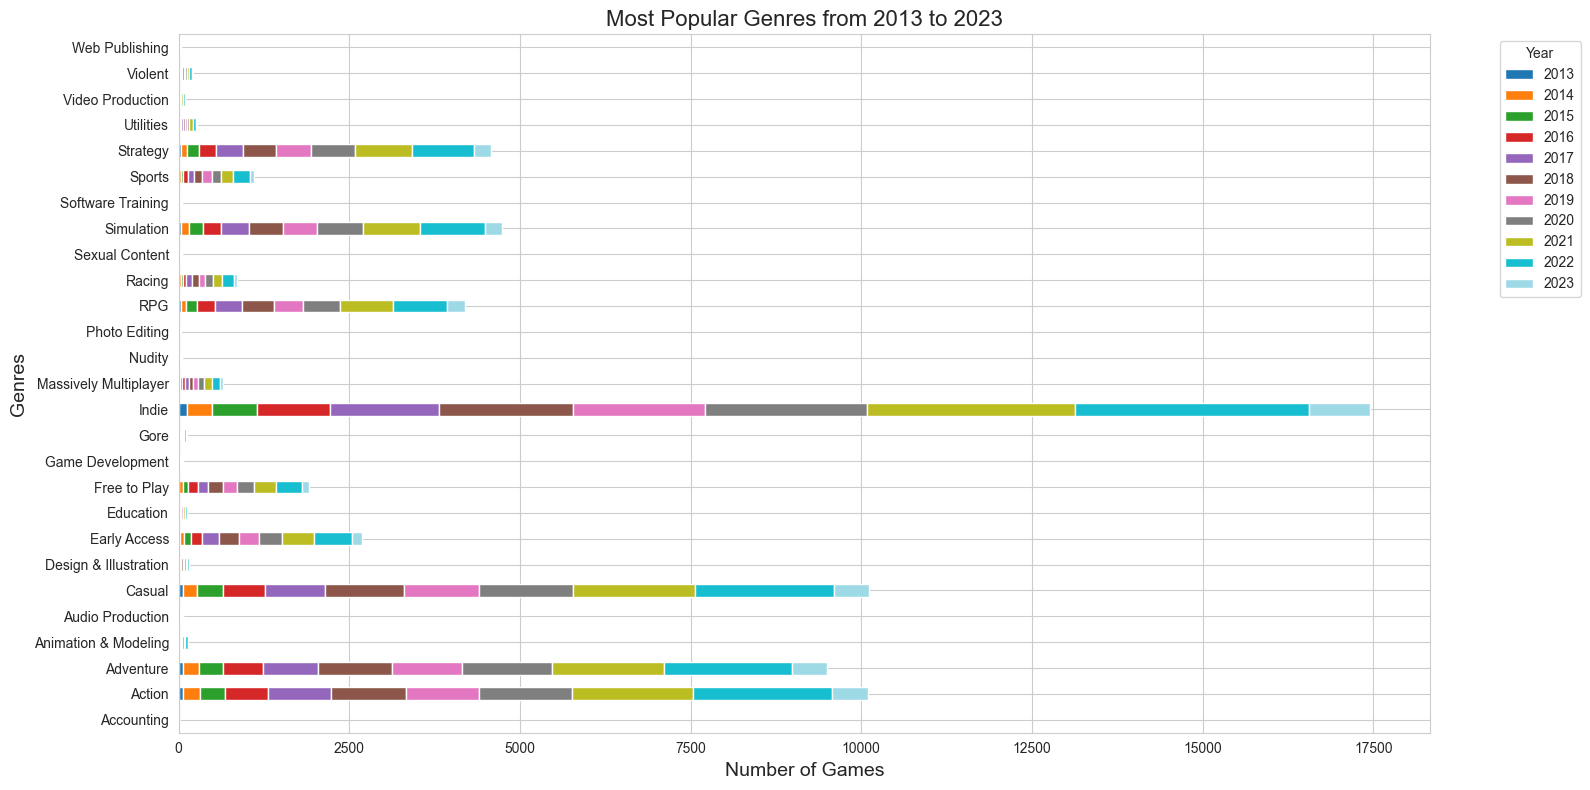

In [69]:
# Filter the DataFrame to include only the years from 2013 to 2023
df_filtered = df[(df['Year'] >= 2013) & (df['Year'] <= 2023)]

# Split the genres and expand them into separate rows
genres_expanded = df_filtered['Genres'].str.split(',').explode().reset_index()

# Merge with the original DataFrame to get the corresponding years
genres_with_years = genres_expanded.merge(df_filtered['Year'], left_index=True, right_index=True)

# Group by year and genre, then count the occurrences
genre_counts = genres_with_years.groupby(['Year', 'Genres']).size().reset_index(name='Count')

# Pivot the DataFrame to make it suitable for Seaborn's barplot
genre_counts_pivot = genre_counts.pivot_table(index='Genres', columns='Year', values='Count', fill_value=0)

# Create the bar plot
plt.figure(figsize=(16, 8))
genre_counts_pivot.plot(kind='barh', stacked=True, ax=plt.gca(), colormap='tab20')

# Set title and labels
plt.title('Most Popular Genres from 2013 to 2023', fontsize=16)
plt.ylabel('Genres', fontsize=14)
plt.xlabel('Number of Games', fontsize=14)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Most Popular Genres from 2013 to 2023
##### Key Findings:
Dominance of Indie Games:

Indie games are the most popular genre from 2013 to 2023, with a substantial number of games exceeding 15,000. This indicates a significant trend towards independent game development and a strong market presence for indie titles.
Popularity of Casual and Action Genres:

Casual games and Action games also have high numbers, each with over 10,000 games. These genres show consistent popularity across the years, highlighting their broad appeal and stable market demand.
Consistent Growth in RPG and Adventure Genres:

RPG (Role-Playing Games) and Adventure games exhibit steady growth, with both genres featuring prominently each year. This trend indicates sustained interest and engagement in narrative-driven and exploratory gameplay experiences.
Variety in Genre Development:

There is a wide variety of genres with notable numbers of games, including Simulation, Strategy, and Massively Multiplayer genres. This diversity suggests that the gaming industry caters to a broad range of player preferences and experiences.
Emerging and Niche Genres:

Genres such as Education, Free to Play, and Early Access, while not as dominant as the top genres, show consistent presence and growth. These emerging and niche genres indicate areas of innovation and specialized interest within the gaming community.
Trends Over the Years:

The distribution across the years shows that certain genres, like Indie, Casual, and Adventure, have seen increased production in recent years (2021-2023). This reflects evolving market trends and shifts in developer focus towards these genres.

##### Conclusion:
The analysis of the most popular genres from 2013 to 2023 provides several key insights into the gaming industry's trends and preferences. Indie games dominate the landscape, reflecting the rise of independent developers and the diverse, innovative experiences they bring to the market. Casual and Action games also maintain strong popularity, indicating their broad and lasting appeal.

Genres like RPG and Adventure show consistent growth, underscoring a sustained interest in immersive, story-driven gameplay. The variety in genre development, with significant numbers in Simulation, Strategy, and Massively Multiplayer games, suggests a healthy diversity in the types of gaming experiences available.

Emerging and niche genres, such as Education and Early Access, highlight areas of innovation and specialized interest, suggesting potential growth opportunities for developers willing to explore these spaces. The trends over the years, with increased production in Indie, Casual, and Adventure games in recent years, reflect changing market dynamics and developer focus.

**Genre Trends:** A heatmap can be a great way to visualize the popularity of genres over the years

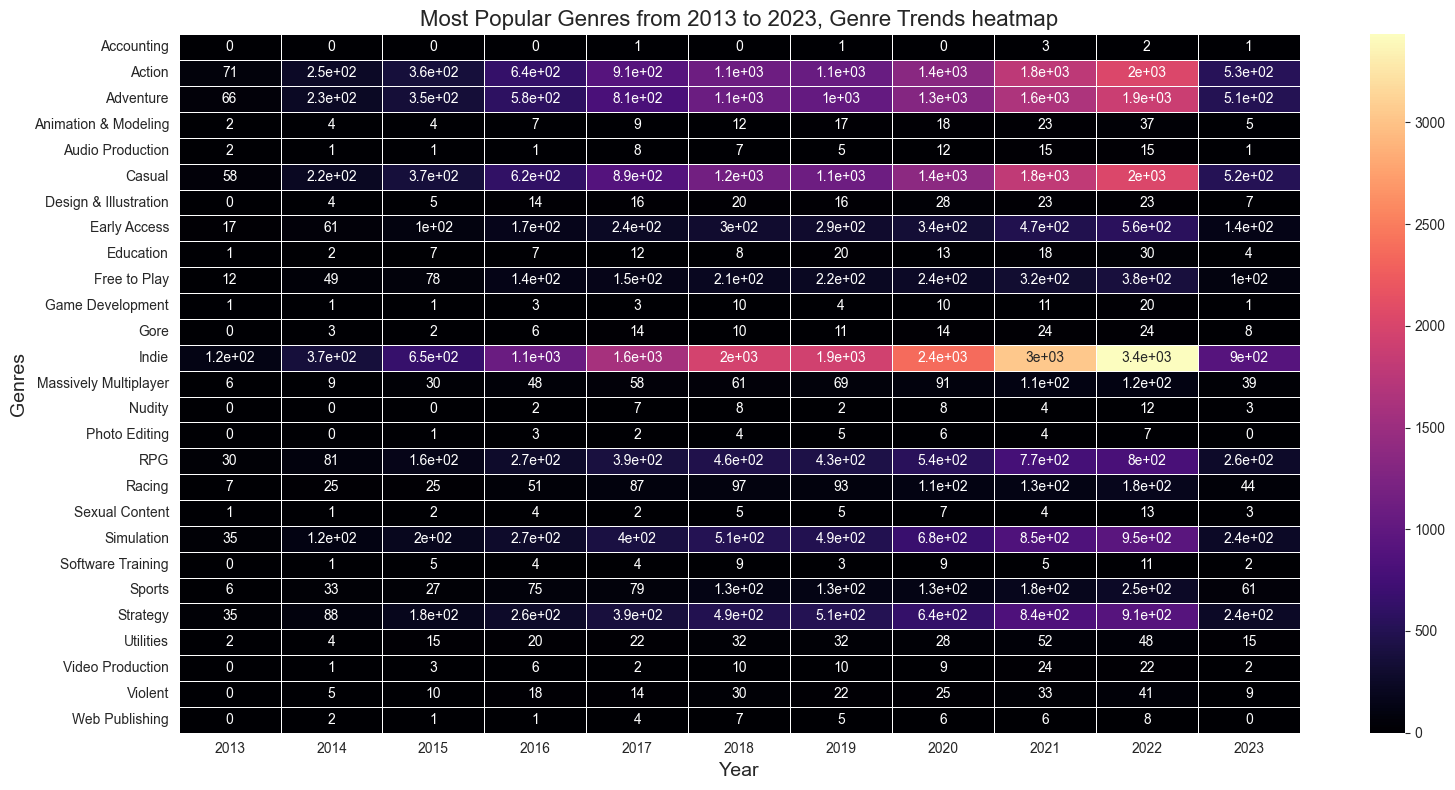

In [31]:
# Filter the DataFrame to include only the years from 2013 to 2023
df_filtered = df[(df['Year'] >= 2013) & (df['Year'] <= 2023)]

# Split the genres and expand them into separate rows
genres_expanded = df_filtered['Genres'].str.split(',').explode().reset_index()

# Merge with the original DataFrame to get the corresponding years
genres_with_years = genres_expanded.merge(df_filtered['Year'], left_index=True, right_index=True)

# Group by year and genre, then count the occurrences
genre_counts = genres_with_years.groupby(['Year', 'Genres']).size().reset_index(name='Count')

# Pivot the DataFrame to make it suitable for Seaborn's heatmap
genre_counts_pivot = genre_counts.pivot_table(index='Genres', columns='Year', values='Count', fill_value=0)

# Create the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(genre_counts_pivot, cmap='magma', annot=True, linewidths=.5)

# Set title and labels
plt.title('Most Popular Genres from 2013 to 2023, Genre Trends heatmap', fontsize=16)
plt.ylabel('Genres', fontsize=14)
plt.xlabel('Year', fontsize=14)

plt.tight_layout()
plt.show()


#### Most Popular Genres from 2013 to 2023, Genre Trends heatmap
##### Key Findings:
Growth of Indie Games:

Indie games have shown substantial growth over the years, starting from 120 in 2013 to a peak of 3,400 in 2021, before a slight decline in the subsequent years. This underscores the rising trend and popularity of independent game development.
Rise in Casual and Action Genres:

Casual games increased from 58 in 2013 to 2,000 in 2021, reflecting their broad and growing appeal. Similarly, Action games have grown significantly, from 71 in 2013 to a peak of 2,000 in 2021, indicating their persistent popularity.
Consistent Popularity of RPG and Adventure Games:

RPG and Adventure games have shown consistent growth. RPGs increased from 30 in 2013 to 800 in 2022, while Adventure games rose from 66 in 2013 to 1,900 in 2022. This demonstrates a steady interest in narrative and exploration-driven gameplay.
Emerging Genres:

Free to Play games, though fewer in number initially (12 in 2013), grew to 380 in 2020, reflecting their increasing market presence. Early Access games also grew from 17 in 2013 to 560 in 2020, indicating a trend towards player-involved development processes.
Stability in Specific Genres:

Strategy and Simulation games have maintained stable growth, with Strategy increasing from 35 in 2013 to 680 in 2022, and Simulation from 35 in 2013 to 680 in 2022. This stability suggests a consistent demand for these types of games.
Low Representation in Niche Genres:

Some genres like Accounting, Photo Editing, and Web Publishing have consistently low numbers, indicating niche markets with limited growth or interest. For instance, Accounting and Web Publishing have zero to very low numbers throughout the years.

##### Conclusion:
The heatmap analysis of the most popular genres from 2013 to 2023 reveals several important trends in the gaming industry. The significant growth of Indie games highlights the increasing influence and success of independent developers. This trend is mirrored by the rise in Casual and Action games, indicating their widespread appeal and stable market demand.

RPG and Adventure games continue to attract a loyal audience, with steady growth over the years, emphasizing the enduring interest in immersive and story-driven experiences. Emerging genres like Free to Play and Early Access games have shown notable growth, reflecting new market dynamics and player engagement strategies.

Meanwhile, Strategy and Simulation games maintain stable popularity, catering to a consistent audience interested in tactical and realistic gameplay experiences. However, certain niche genres such as Accounting, Photo Editing, and Web Publishing remain low in number, indicating limited market interest.

For game developers and publishers, these insights are crucial in strategizing future projects. Focusing on the growing and consistently popular genres can maximize market reach and success. Additionally, exploring emerging trends and understanding the factors driving the popularity of specific genres can provide valuable direction for innovation and targeted game development.

**Ownership Analysis:** Histogram: What is the distribution of estimated owners over the years

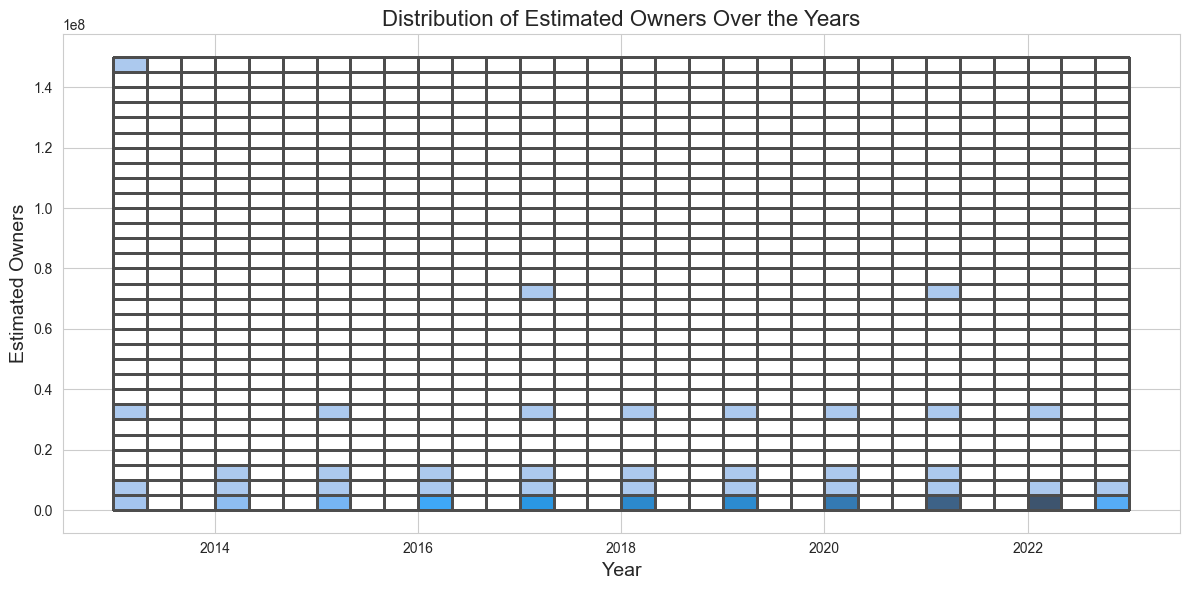

In [92]:
# Set the style for Seaborn
sns.set_style("whitegrid")

# Convert the 'Estimated owners' column to a numeric type
# Assuming the column contains ranges, we'll take the midpoint of the range
df['estimated_owners'] = df['Estimated owners'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

# Filter the data for the years 2013 to 2023
filtered_data = df[(df['Year'] >= 2013) & (df['Year'] <= 2023)]

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_data, x='Year', y='estimated_owners', bins=30, edgecolor='.3')

# Set title and labels
plt.title('Distribution of Estimated Owners Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Estimated Owners', fontsize=14)

plt.tight_layout()
plt.show()

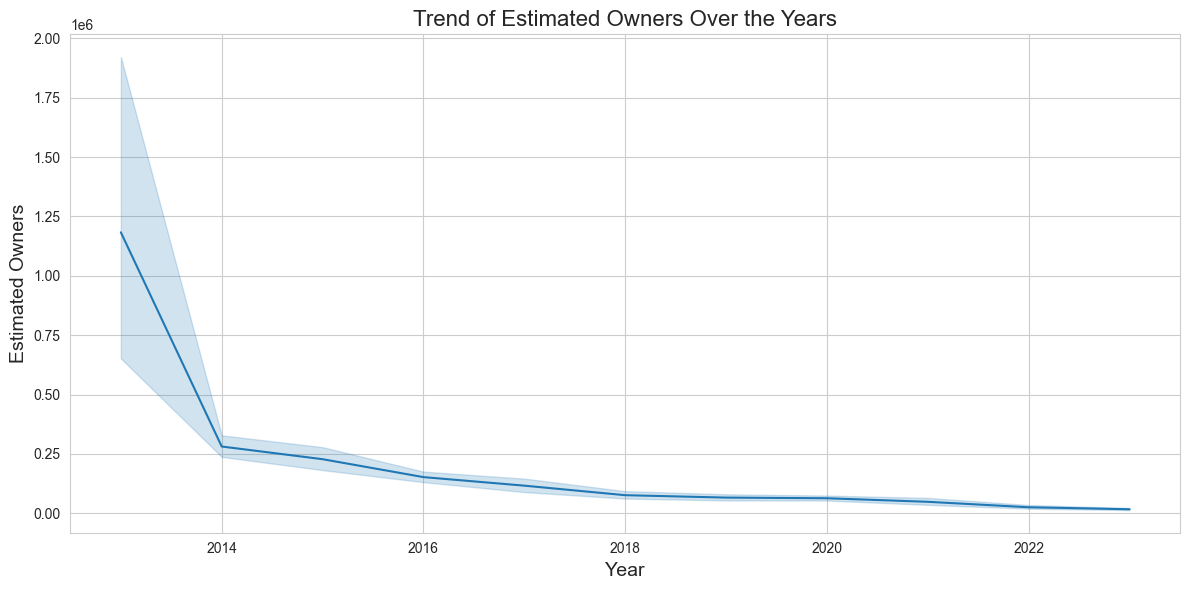

In [96]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='Year', y='estimated_owners')

plt.title('Trend of Estimated Owners Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Estimated Owners', fontsize=14)

plt.tight_layout()
plt.show()

## Summery

The analysis of the Steam games dataset provides a comprehensive and insightful exploration of various aspects of the gaming industry. Key highlights of the analysis include:

Most Played Games: By investigating different playtime metrics, the analysis identifies the top 10 most played games. This information sheds light on the popularity and engagement levels of various games, providing a snapshot of current gaming trends.

Success Analysis: The success rate of games over the years is examined through histograms, bar plots, and heatmaps. The study reveals how different genres and platforms (Windows/Mac/Linux) correlate with game success, offering insights into the critical success factors in the gaming industry.

Audience Targeting: A detailed look at how games are targeted towards different audience categories (Kids, Teens, Adults) uncovers the shifts and strategies in audience targeting over the years. Correlations between features such as price, estimated owners, and platforms with targeted audiences provide a nuanced view of market segmentation.

Platform Preferences: The distribution of games across Windows, Mac, and Linux platforms is explored, along with correlations between platforms, genres, and success. This section highlights platform preferences and how they align with genres and success metrics, reflecting the evolving landscape of gaming platforms.

Price Analysis: The analysis delves into the distribution of game prices over the years, exploring the pricing strategies employed in the gaming industry. This examination helps in understanding how pricing relates to other aspects of games, such as genre, success, and audience targeting.

Data Cleaning and Visualization: The data cleaning process ensures the quality and accuracy of the dataset, while the visualization techniques employed throughout the analysis provide clear and informative representations of the data, aiding in interpretation and decision-making.

Overall, the analysis offers a multifaceted and in-depth view of the gaming industry. By exploring game popularity, success factors, audience targeting, platform preferences, and pricing, the study uncovers valuable insights and trends. These findings can serve as a vital resource for developers, marketers, and other stakeholders in the gaming industry, aiding in strategic planning and development.

## Conclusion

The exploration of the Steam games dataset has culminated in a rich and multifaceted analysis that provides significant insights into the contemporary gaming industry. Key conclusions drawn from the project include:

Understanding Player Engagement: The identification of the most played games offers valuable insights into player preferences and engagement. Recognizing these trends can inform game development and marketing strategies to align with player interests.

Success Factors Unveiled: The analysis of success rates, genres, and platforms reveals underlying patterns that contribute to a game's success. These insights can guide developers in optimizing game design, platform selection, and genre targeting.

Audience Targeting Insights: The examination of audience targeting strategies underscores the importance of understanding and catering to different audience segments. This knowledge can aid in crafting games that resonate with specific demographics, enhancing player satisfaction and loyalty.

Platform Dynamics: Insights into platform preferences and their correlation with genres and success shed light on the evolving platform landscape. Developers and publishers can leverage this information to make informed platform choices that align with their game's genre and potential success.

Pricing Strategies Explored: The analysis of pricing trends provides a window into the economic aspects of the gaming industry. Understanding pricing dynamics can inform pricing strategies that balance profitability with accessibility and competitiveness.

Visual Storytelling: The use of various data visualization techniques has not only facilitated the understanding of complex data relationships but also created a visually engaging narrative that enhances the impact of the analysis.

Implications for the Industry: Overall, the findings of this analysis offer actionable insights for game developers, publishers, marketers, and other industry stakeholders. The project serves as a valuable resource for informed decision-making, strategic planning, and innovative thinking within the gaming industry.

In conclusion, this project represents a significant contribution to the understanding of the gaming industry, weaving together multiple strands of analysis into a cohesive and insightful narrative. The thoughtful exploration of player engagement, success factors, audience targeting, platform preferences, and pricing, supported by clear and informative visualizations, makes this analysis a standout piece. It sets a benchmark for data-driven insights and provides a roadmap for future research and development in the gaming industry. Whether for industry professionals or gaming enthusiasts, the findings of this project offer a unique and valuable perspective on the ever-evolving world of gaming.